In [1]:
import pandas as pd

#gta = pd.read_csv('C:\\Users\\admin\\Documents\\GTA_Plots\\GTA_reduceData.csv', header=-1, dtype={"time": DatetimeIndex, "idsession": int, "scenario" : int, "speed" : float, "nextpedestrianrunning" : int, "nextpedestrianid" : int})

#steering = pd.read_csv('C:\\Users\\admin\\Documents\\GTA_Plots\\steeringData.csv', header=-1)
import psycopg2


In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

In [3]:
# Define our connection string
conn_string = "host='localhost' port='5432' dbname='GTA' user='postgres'"

# print the connection string we will use to connect
print ("Connecting to database\n	->")

# get a connection, if a connect cannot be made an exception will be raised here
conn = psycopg2.connect(conn_string)

# conn.cursor will return a cursor object, you can use this cursor to perform queries
cursor = conn.cursor()
print( "Connected!\n" )

#cursor.execute('SELECT * FROM  public."GTA_DataView";')

Connecting to database
	->
Connected!



In [9]:
timestamps = [row[0] for row in rows]
df = pd.DataFrame(rows,  index=timestamps)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2017-09-21 08:19:13.400783,2017-09-21 08:19:13.400783,2,7,-975.750000,82.250000,51.564873,0.0,0.00000,0.000000,0.000000e+00,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-09-21 08:19:13.769262,2017-09-21 08:19:13.769262,2,7,-975.704651,82.260086,51.549065,0.0,0.21000,0.148496,0.000000e+00,-0.065652,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-09-21 08:19:13.806862,2017-09-21 08:19:13.806862,2,7,-975.704163,82.258224,51.551018,0.0,0.21000,0.075390,0.000000e+00,-0.065652,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-09-21 08:19:13.824910,2017-09-21 08:19:13.824910,2,7,-975.704041,82.257640,51.552690,0.0,0.21000,0.085482,0.000000e+00,-0.065652,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-09-21 08:19:13.837945,2017-09-21 08:19:13.837945,2,7,-975.703900,82.257250,51.554287,0.0,0.21000,0.099966,0.000000e+00,-0.065652,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-09-21 08:19:13.859502,2017-09-21 08:19:13.859502,2,7,-975.703800,82.256900,51.555946,0.0,0.21000,0.105966,0.000000e+00,-0.065652,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-09-21 08:19:13.877049,2017-09-21 08:19:13.877049,2,7,-975.703700,82.256485,51.558020,0.0,0.21000,0.104028,0.000000e+00,-0.065652,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-09-21 08:19:13.895598,2017-09-21 08:19:13.895598,2,7,-975.703552,82.256140,51.560093,0.0,0.21000,0.101747,0.000000e+00,-0.065652,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-09-21 08:19:13.913646,2017-09-21 08:19:13.913646,2,7,-975.703400,82.255890,51.562070,0.0,0.21000,0.095573,0.000000e+00,-0.065652,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-09-21 08:19:13.937209,2017-09-21 08:19:13.937209,2,7,-975.703400,82.255714,51.563877,0.0,0.21000,0.086625,0.000000e+00,-0.065652,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.head()
dfDiff = df.diff()
dfDiff

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2017-09-21 08:19:13.400783,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-21 08:19:13.769262,00:00:00.368479,0.0,0.0,0.045349,0.010086,-0.015808,0.0,0.21,0.148496,0.000000e+00,-0.065652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-09-21 08:19:13.806862,00:00:00.037600,0.0,0.0,0.000488,-0.001862,0.001953,0.0,0.00,-0.073106,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-09-21 08:19:13.824910,00:00:00.018048,0.0,0.0,0.000122,-0.000585,0.001672,0.0,0.00,0.010093,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-09-21 08:19:13.837945,00:00:00.013035,0.0,0.0,0.000141,-0.000390,0.001597,0.0,0.00,0.014483,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-09-21 08:19:13.859502,00:00:00.021557,0.0,0.0,0.000100,-0.000350,0.001659,0.0,0.00,0.006000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-09-21 08:19:13.877049,00:00:00.017547,0.0,0.0,0.000100,-0.000415,0.002074,0.0,0.00,-0.001938,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-09-21 08:19:13.895598,00:00:00.018549,0.0,0.0,0.000148,-0.000345,0.002073,0.0,0.00,-0.002281,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-09-21 08:19:13.913646,00:00:00.018048,0.0,0.0,0.000152,-0.000250,0.001977,0.0,0.00,-0.006174,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-09-21 08:19:13.937209,00:00:00.023563,0.0,0.0,0.000000,-0.000176,0.001807,0.0,0.00,-0.008947,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.columns=['time','session_id','scenario', 'speed', 'nextpedestrianrunning',  'nextpedestrianid']

In [36]:
df_steer = pd.DataFrame(rows, index=timestamps)

In [38]:
#df_steer.columns=['time','session_id','scenario', 'steering', 'brake',  'throttle', 'clutch']
#df_steer.dtypes

time          datetime64[ns]
session_id             int64
scenario               int64
steering             float64
brake                float64
throttle             float64
clutch               float64
dtype: object

In [39]:
df_steer.head()

,time,session_id,scenario,steering,brake,throttle,clutch
2017-09-21 08:19:13.405295,2017-09-21 08:19:13.405295,2,7,33628.0,65535.0,65535.0,65535.0
2017-09-21 08:19:13.410308,2017-09-21 08:19:13.410308,2,7,33628.0,65535.0,65535.0,65535.0
2017-09-21 08:19:13.415321,2017-09-21 08:19:13.415321,2,7,33628.0,65535.0,65535.0,65535.0
2017-09-21 08:19:13.421337,2017-09-21 08:19:13.421337,2,7,33628.0,65535.0,65535.0,65535.0
2017-09-21 08:19:13.426350,2017-09-21 08:19:13.426350,2,7,33628.0,65535.0,65535.0,65535.0


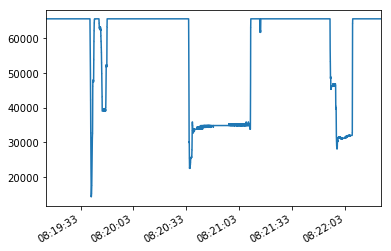

In [44]:
df_steer['2017-09-21 08:19:13.410308':'2017-09-21 08:22:23.410308'].brake.plot()

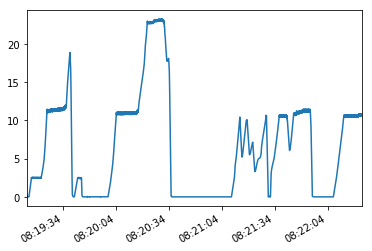

In [60]:
df['2017-09-21 08:19:13.410308':'2017-09-21 08:22:23.410308'].speed.plot()

In [21]:
df_steer

,time,session_id,scenario,steering,brake,throttle,clutch
0,2017-09-21 08:19:13.405295,2,7,33628.0,65535.0,65535.0,65535.0
1,2017-09-21 08:19:13.410308,2,7,33628.0,65535.0,65535.0,65535.0
2,2017-09-21 08:19:13.415321,2,7,33628.0,65535.0,65535.0,65535.0
3,2017-09-21 08:19:13.421337,2,7,33628.0,65535.0,65535.0,65535.0
4,2017-09-21 08:19:13.426350,2,7,33628.0,65535.0,65535.0,65535.0
5,2017-09-21 08:19:13.431364,2,7,33628.0,65535.0,65535.0,65535.0
6,2017-09-21 08:19:13.436377,2,7,33628.0,65535.0,65535.0,65535.0
7,2017-09-21 08:19:13.441390,2,7,33628.0,65535.0,65535.0,65535.0
8,2017-09-21 08:19:13.446404,2,7,33628.0,65535.0,65535.0,65535.0
9,2017-09-21 08:19:13.451417,2,7,33628.0,65535.0,65535.0,65535.0


In [78]:
df

,time,session_id,scenario,speed,nextpedestrianrunning,nextpedestrianid
2017-09-21 08:19:13.400783,2017-09-21 08:19:13.400783,2,7,0.000000,0.0,0.0
2017-09-21 08:19:13.769262,2017-09-21 08:19:13.769262,2,7,0.148496,0.0,0.0
2017-09-21 08:19:13.806862,2017-09-21 08:19:13.806862,2,7,0.075390,0.0,0.0
2017-09-21 08:19:13.824910,2017-09-21 08:19:13.824910,2,7,0.085482,0.0,0.0
2017-09-21 08:19:13.837945,2017-09-21 08:19:13.837945,2,7,0.099966,0.0,0.0
2017-09-21 08:19:13.859502,2017-09-21 08:19:13.859502,2,7,0.105966,0.0,0.0
2017-09-21 08:19:13.877049,2017-09-21 08:19:13.877049,2,7,0.104028,0.0,0.0
2017-09-21 08:19:13.895598,2017-09-21 08:19:13.895598,2,7,0.101747,0.0,0.0
2017-09-21 08:19:13.913646,2017-09-21 08:19:13.913646,2,7,0.095573,0.0,0.0
2017-09-21 08:19:13.937209,2017-09-21 08:19:13.937209,2,7,0.086625,0.0,0.0


In [89]:
freq_resample = '50000U'
df_new = df.resample(freq_resample).ffill()


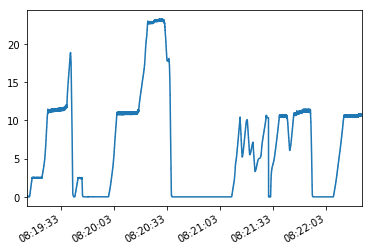

In [80]:
df_new['2017-09-21 08:19:13.410308':'2017-09-21 08:22:23.410308'].speed.plot()

In [103]:
df_new_steer = df_steer.resample(freq_resample).ffill()

steer = df_new_steer.drop(df_new_steer.columns[[1, 2]], axis=1)

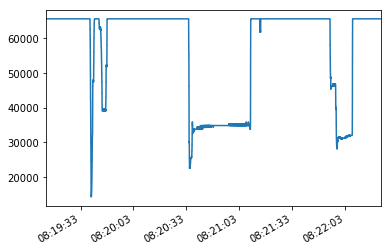

In [67]:
df_new_steer['2017-09-21 08:19:13.410308':'2017-09-21 08:22:23.410308'].brake.plot()

In [104]:
steer = df_new_steer.drop(df_new_steer.columns[[1, 2]], axis=1)
df_joined = pd.concat([df_new, steer], axis=1, join='inner')

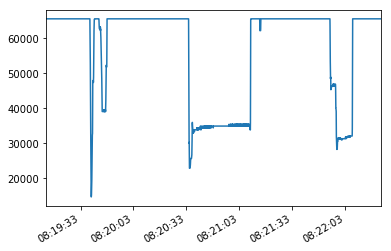

In [98]:
df_joined['2017-09-21 08:19:13.410308':'2017-09-21 08:22:23.410308'].brake.plot()

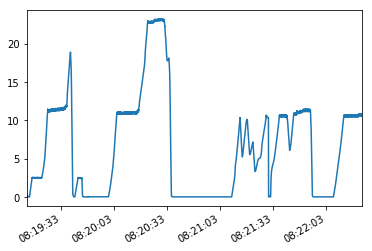

In [99]:
df_joined['2017-09-21 08:19:13.410308':'2017-09-21 08:22:23.410308'].speed.plot()

In [105]:
#session2Scenario2 = df_joined[(df.session_id == 2) & (df.scenario == 2)]
df_joined

,time,session_id,scenario,speed,nextpedestrianrunning,nextpedestrianid,time,steering,brake,throttle,clutch
2017-09-21 08:19:13.400,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2017-09-21 08:19:13.450,2017-09-21 08:19:13.400783,2.0,7.0,0.000000,0.0,0.0,2017-09-21 08:19:13.446404,33628.0,65535.0,65535.0,65535.0
2017-09-21 08:19:13.500,2017-09-21 08:19:13.400783,2.0,7.0,0.000000,0.0,0.0,2017-09-21 08:19:13.496036,33628.0,65535.0,65535.0,65535.0
2017-09-21 08:19:13.550,2017-09-21 08:19:13.400783,2.0,7.0,0.000000,0.0,0.0,2017-09-21 08:19:13.546169,33628.0,65535.0,65535.0,65535.0
2017-09-21 08:19:13.600,2017-09-21 08:19:13.400783,2.0,7.0,0.000000,0.0,0.0,2017-09-21 08:19:13.596302,33628.0,65535.0,65535.0,65535.0
2017-09-21 08:19:13.650,2017-09-21 08:19:13.400783,2.0,7.0,0.000000,0.0,0.0,2017-09-21 08:19:13.646436,33628.0,65535.0,65535.0,65535.0
2017-09-21 08:19:13.700,2017-09-21 08:19:13.400783,2.0,7.0,0.000000,0.0,0.0,2017-09-21 08:19:13.696068,33628.0,65535.0,65535.0,65535.0
2017-09-21 08:19:13.750,2017-09-21 08:19:13.400783,2.0,7.0,0.000000,0.0,0.0,2017-09-21 08:19:13.746201,33628.0,65535.0,65535.0,65535.0
2017-09-21 08:19:13.800,2017-09-21 08:19:13.769262,2.0,7.0,0.148496,0.0,0.0,2017-09-21 08:19:13.795833,33628.0,65535.0,65535.0,65535.0
2017-09-21 08:19:13.850,2017-09-21 08:19:13.837945,2.0,7.0,0.099966,0.0,0.0,2017-09-21 08:19:13.845465,33628.0,65535.0,65535.0,65535.0


In [131]:
session2Scenario2 = df_joined[(df_joined.session_id == 2.0) & (df_joined.scenario == 2.0) & (df_joined.nextpedestrianid == 8.0)]
session3Scenario2 = df_joined[(df_joined.session_id == 3.0) & (df_joined.scenario == 2.0) & (df_joined.nextpedestrianid == 8.0)]
session4Scenario2 = df_joined[(df_joined.session_id == 4.0) & (df_joined.scenario == 2.0) & (df_joined.nextpedestrianid == 8.0)]

In [132]:
session2Scenario2

,time,session_id,scenario,speed,nextpedestrianrunning,nextpedestrianid,time,steering,brake,throttle,clutch
2017-09-21 08:27:45.650,2017-09-21 08:27:45.609753,2.0,2.0,0.000000,0.0,8.0,2017-09-21 08:27:45.649860,32759.0,65535.0,42390.0,65535.0
2017-09-21 08:27:45.700,2017-09-21 08:27:45.609753,2.0,2.0,0.000000,0.0,8.0,2017-09-21 08:27:45.699993,32759.0,65535.0,42390.0,65535.0
2017-09-21 08:27:45.750,2017-09-21 08:27:45.609753,2.0,2.0,0.000000,0.0,8.0,2017-09-21 08:27:45.745113,32759.0,65535.0,42390.0,65535.0
2017-09-21 08:27:45.800,2017-09-21 08:27:45.790233,2.0,2.0,0.039433,0.0,8.0,2017-09-21 08:27:45.796750,32759.0,65535.0,42390.0,65535.0
2017-09-21 08:27:45.850,2017-09-21 08:27:45.848889,2.0,2.0,0.138771,0.0,8.0,2017-09-21 08:27:45.847886,32759.0,65535.0,42390.0,65535.0
2017-09-21 08:27:45.900,2017-09-21 08:27:45.889497,2.0,2.0,0.137482,0.0,8.0,2017-09-21 08:27:45.893006,32759.0,65535.0,42390.0,65535.0
2017-09-21 08:27:45.950,2017-09-21 08:27:45.941636,2.0,2.0,0.093999,0.0,8.0,2017-09-21 08:27:45.949156,32759.0,65535.0,42390.0,65535.0
2017-09-21 08:27:46.000,2017-09-21 08:27:45.981241,2.0,2.0,0.052366,0.0,8.0,2017-09-21 08:27:45.999790,32759.0,65535.0,42390.0,65535.0
2017-09-21 08:27:46.050,2017-09-21 08:27:46.047417,2.0,2.0,0.021543,0.0,8.0,2017-09-21 08:27:46.047918,32759.0,65535.0,42390.0,65535.0
2017-09-21 08:27:46.100,2017-09-21 08:27:46.087022,2.0,2.0,0.021706,0.0,8.0,2017-09-21 08:27:46.095545,32759.0,65535.0,42390.0,65535.0


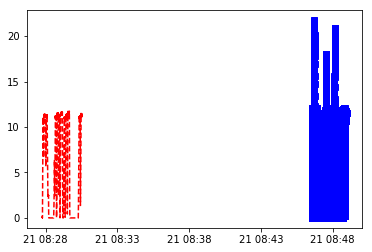

In [112]:
plt.plot(session2Scenario2.index, session2Scenario2.speed, 'r--', session3Scenario2.index, session3Scenario2.speed, 'bs')
plt.show()

In [133]:
fmt = '%Y-%m-%d %H:%M:%S'
tstamp1 = datetime.strptime('2017-09-21 00:00:00', fmt)

In [134]:
diff2 = session2Scenario2.index[0] - tstamp1
diff3 = session3Scenario2.index[0] - tstamp1
diff4 = session4Scenario2.index[0] - tstamp1

In [135]:
session2Scenario2.index = session2Scenario2.index - diff2
session3Scenario2.index = session3Scenario2.index - diff3
session4Scenario2.index = session4Scenario2.index - diff4

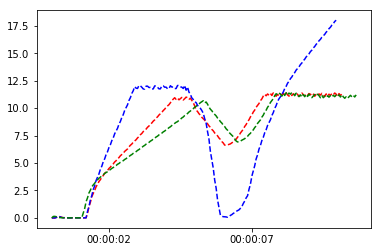

In [143]:
plt.plot(session2Scenario2.index, session2Scenario2.speed, 'r--', session3Scenario2.index, session3Scenario2.speed, 'b--', session4Scenario2.index, session4Scenario2.speed, 'g--')
plt.savefig('speed_time.png')
plt.show()

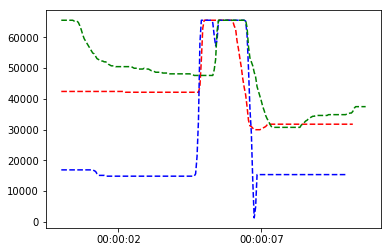

In [146]:
plt.plot(session2Scenario2.index, session2Scenario2.throttle, 'r--', session3Scenario2.index, session3Scenario2.throttle, 'b--', session4Scenario2.index, session4Scenario2.throttle, 'g--')
plt.savefig('throttle_time.png')
plt.show()

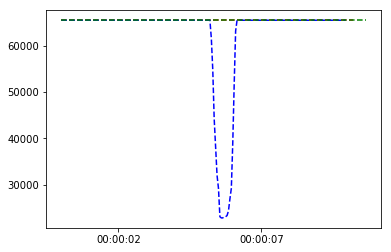

In [147]:
plt.plot(session2Scenario2.index, session2Scenario2.brake, 'r--', session3Scenario2.index, session3Scenario2.brake, 'b--', session4Scenario2.index, session4Scenario2.brake, 'g--')
plt.savefig('brake_time.png')
plt.show()

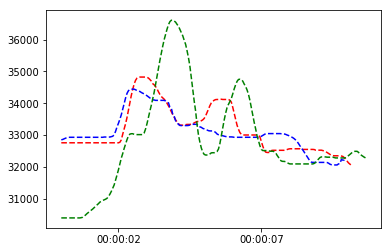

In [148]:
plt.plot(session2Scenario2.index, session2Scenario2.steering, 'r--', session3Scenario2.index, session3Scenario2.steering, 'b--', session4Scenario2.index, session4Scenario2.steering, 'g--')
plt.savefig('steering_time.png')
plt.show()

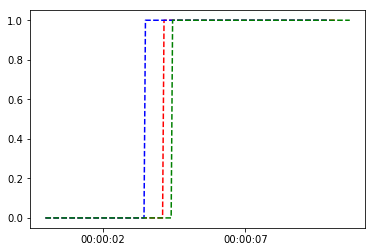

In [149]:
plt.plot(session2Scenario2.index, session2Scenario2.nextpedestrianrunning, 'r--', session3Scenario2.index, session3Scenario2.nextpedestrianrunning, 'b--', session4Scenario2.index, session4Scenario2.nextpedestrianrunning, 'g--')
plt.savefig('nextpedestrianrunning_time.png')
plt.show()

In [173]:

seriePedRun = pd.Series(session3Scenario2.steering, session3Scenario2.index)


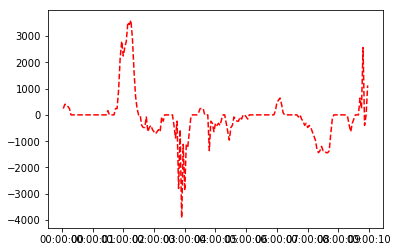

In [174]:
plt.plot(seriePedRun.diff()/seriePedRun.index.to_series().diff().dt.total_seconds(), 'r--')

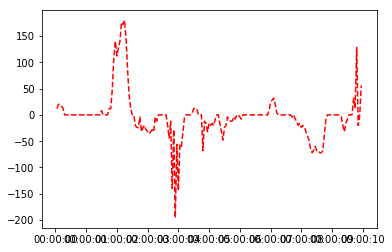

In [175]:
plt.plot(seriePedRun.diff(), 'r--')

In [176]:
#diif/seconds
#brake = -1000
#throttle = 100000
#steering = 1000 or -1000

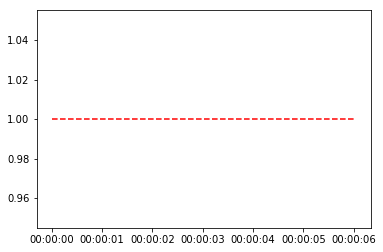

In [178]:

session2Triggered = session2Scenario2[session2Scenario2.nextpedestrianrunning == 1]
diff2Trigg = session2Triggered.index[0] - tstamp1
session2Triggered.index = session2Triggered.index - diff2Trigg
plt.plot(session2Triggered.index, session2Triggered.nextpedestrianrunning, 'r--')
plt.show()

In [180]:
#throttle
session2Throttle = pd.Series(session2Triggered.throttle, session2Triggered.index)
session2ThrottleDerivate = session2Throttle.diff()/session2Throttle.index.to_series().diff().dt.total_seconds()
session2ThrottleDerivate[(session2ThrottleDerivate > 100000)]

2017-09-21 00:00:00.750    171640.0
2017-09-21 00:00:00.800    208040.0
Freq: 50L, dtype: float64

In [183]:
#reaction Throttle
session2ThrottleDerivate[(session2ThrottleDerivate > 100000)].index[0]

Timestamp('2017-09-21 00:00:00.750000', freq='50L')

In [184]:
#Brake
session2Brake = pd.Series(session2Triggered.brake, session2Triggered.index)
session2BrakeDerivate = session2Brake.diff()/session2Brake.index.to_series().diff().dt.total_seconds()
session2BrakeDerivate[(session2BrakeDerivate < -1000)]

Series([], Freq: 50L, dtype: float64)

In [186]:
#reaction Brake
session2BrakeDerivate[(session2BrakeDerivate < -1000)]
#No reaction

Series([], Freq: 50L, dtype: float64)

In [187]:
#Steering
session2Steering = pd.Series(session2Triggered.steering, session2Triggered.index)
session2SteeringDerivate = session2Steering.diff()/session2Steering.index.to_series().diff().dt.total_seconds()
session2SteeringDerivate[(session2SteeringDerivate > 1000) | (session2SteeringDerivate < -1000)]

2017-09-21 00:00:00.900    1600.0
2017-09-21 00:00:00.950    2080.0
2017-09-21 00:00:01.000    2160.0
2017-09-21 00:00:01.050    2240.0
2017-09-21 00:00:01.100    1680.0
2017-09-21 00:00:01.800   -1200.0
2017-09-21 00:00:01.850   -3280.0
2017-09-21 00:00:01.900   -3760.0
2017-09-21 00:00:01.950   -3920.0
2017-09-21 00:00:02.000   -3520.0
2017-09-21 00:00:02.050   -2560.0
2017-09-21 00:00:02.100   -2080.0
2017-09-21 00:00:02.150   -1120.0
2017-09-21 00:00:02.800   -1200.0
2017-09-21 00:00:02.850   -2880.0
2017-09-21 00:00:02.900   -2900.0
2017-09-21 00:00:02.950   -2400.0
2017-09-21 00:00:03.000   -1360.0
2017-09-21 00:00:03.200    1120.0
2017-09-21 00:00:05.800   -1120.0
2017-09-21 00:00:05.850   -1200.0
2017-09-21 00:00:05.900   -1040.0
dtype: float64

In [188]:
#reaction Steering
session2SteeringDerivate[(session2SteeringDerivate > 1000) | (session2SteeringDerivate < -1000)].index[0]

Timestamp('2017-09-21 00:00:00.900000')

In [189]:
#reaction Time
min(session2ThrottleDerivate[(session2ThrottleDerivate > 100000)].index[0], session2SteeringDerivate[(session2SteeringDerivate > 1000) | (session2SteeringDerivate < -1000)].index[0])
#No brake reaction here

Timestamp('2017-09-21 00:00:00.750000', freq='50L')

In [203]:
#Reaction Sesion 3
session3Triggered = session3Scenario2[session3Scenario2.nextpedestrianrunning == 1]
diff3Trigg = session3Triggered.index[0] - tstamp1
session3Triggered.index = session3Triggered.index - diff3Trigg
#throttle
session3Throttle = pd.Series(session3Triggered.throttle, session3Triggered.index)
session3ThrottleDerivate = session3Throttle.diff()/session3Throttle.index.to_series().diff().dt.total_seconds()
#reaction Throttle
if (session3ThrottleDerivate[(session3ThrottleDerivate > 100000)].empty):
    reacTimeThrottle = diff3Trigg
else:
    reacTimeThrottle = session3ThrottleDerivate[(session3ThrottleDerivate > 100000)].index[0]



#Brake
session3Brake = pd.Series(session3Triggered.brake, session3Triggered.index)
session3BrakeDerivate = session3Brake.diff()/session3Brake.index.to_series().diff().dt.total_seconds()

#reaction Brake
if (session3BrakeDerivate[(session3BrakeDerivate < -1000)].empty):
    reacTimeBrake = diff3Trigg
else:
    reacTimeBrake = session3BrakeDerivate[(session3BrakeDerivate < -1000)].index[0]

    
#Steering
session3Steering = pd.Series(session3Triggered.steering, session3Triggered.index)
session3SteeringDerivate = session3Steering.diff()/session3Steering.index.to_series().diff().dt.total_seconds()
session3SteeringDerivate[(session3SteeringDerivate > 1000) | (session3SteeringDerivate < -1000)]    
#reaction Steering
if (session3SteeringDerivate[(session3SteeringDerivate > 1000) | (session3SteeringDerivate < -1000)].empty):
    reacTimeSteering = diff3Trigg
else:
    reacTimeSteering = session3SteeringDerivate[(session3SteeringDerivate > 1000) | (session3SteeringDerivate < -1000)].index[0]

#reaction Time
min(reacTimeThrottle, reacTimeBrake, reacTimeSteering)

Timestamp('2017-09-21 00:00:00.300000')

In [207]:
#Reaction Sesion 4
session4Triggered = session4Scenario2[session4Scenario2.nextpedestrianrunning == 1]
diff4Trigg = session4Triggered.index[0] - tstamp1
session4Triggered.index = session4Triggered.index - diff4Trigg
#throttle
session4Throttle = pd.Series(session4Triggered.throttle, session4Triggered.index)
session4ThrottleDerivate = session4Throttle.diff()/session4Throttle.index.to_series().diff().dt.total_seconds()
#reaction Throttle
if (session4ThrottleDerivate[(session4ThrottleDerivate > 100000)].empty):
    reacTimeThrottle = diff4Trigg
else:
    reacTimeThrottle = session4ThrottleDerivate[(session4ThrottleDerivate > 100000)].index[0]



#Brake
session4Brake = pd.Series(session4Triggered.brake, session4Triggered.index)
session4BrakeDerivate = session4Brake.diff()/session4Brake.index.to_series().diff().dt.total_seconds()

#reaction Brake
if (session4BrakeDerivate[(session4BrakeDerivate < -1000)].empty):
    reacTimeBrake = session4BrakeDerivate.index[-1]
else:
    reacTimeBrake = session4BrakeDerivate[(session4BrakeDerivate < -1000)].index[0]

    
#Steering
session4Steering = pd.Series(session4Triggered.steering, session4Triggered.index)
session4SteeringDerivate = session4Steering.diff()/session4Steering.index.to_series().diff().dt.total_seconds()
session4SteeringDerivate[(session4SteeringDerivate > 1000) | (session4SteeringDerivate < -1000)]    
#reaction Steering
if (session4SteeringDerivate[(session4SteeringDerivate > 1000) | (session4SteeringDerivate < -1000)].empty):
    reacTimeSteering = session4SteeringDerivate.index[-1]
else:
    reacTimeSteering = session4SteeringDerivate[(session4SteeringDerivate > 1000) | (session4SteeringDerivate < -1000)].index[0]

#reaction Time
min(reacTimeThrottle, reacTimeBrake, reacTimeSteering)

Timestamp('2017-09-21 00:00:00.050000')

In [35]:
cursor.execute('SELECT * FROM public."GTA_DataView" gta  WHERE gta.idsession = %s', [2])
rows = cursor.fetchall()


In [42]:
timestamps = [row[0] for row in rows]
#if (len(timestamps) == 0):
#    return
firstTime = timestamps[:1][0]
lastTime = timestamps[-1:][0]
dfGTA = pd.DataFrame(rows, index=timestamps)
dfDiffGTA = dfGTA.diff()

#print "Data rate per seconds from GTA: " + str(len(timestamps) / (lastTime - firstTime).total_seconds()) + " (Normally ~47)"
#print "GTA: Rows with difference more than 1 second: " + str( len(dfDiffGTA[(dfDiffGTA[[1]] > "00:00:01.00000")].index))
#dfDiffGTA[(dfDiffGTA[[1]] > "00:00:01.00000")].index


In [49]:
len(dfDiffGTA[(dfDiffGTA[0] > "00:00:01.00000")].index)

5

In [7]:
cursor.execute('SELECT * FROM datagta gta  WHERE gta.idsession = %s AND gta.data_type_id=1;', [2])
rows = cursor.fetchall()
timestamps = [row[1] for row in rows]

In [8]:
timestamps

[datetime.datetime(2017, 9, 21, 8, 19, 13, 400783),
 datetime.datetime(2017, 9, 21, 8, 19, 13, 769262),
 datetime.datetime(2017, 9, 21, 8, 19, 13, 806862),
 datetime.datetime(2017, 9, 21, 8, 19, 13, 824910),
 datetime.datetime(2017, 9, 21, 8, 19, 13, 837945),
 datetime.datetime(2017, 9, 21, 8, 19, 13, 859502),
 datetime.datetime(2017, 9, 21, 8, 19, 13, 877049),
 datetime.datetime(2017, 9, 21, 8, 19, 13, 895598),
 datetime.datetime(2017, 9, 21, 8, 19, 13, 913646),
 datetime.datetime(2017, 9, 21, 8, 19, 13, 937209),
 datetime.datetime(2017, 9, 21, 8, 19, 13, 954755),
 datetime.datetime(2017, 9, 21, 8, 19, 13, 975812),
 datetime.datetime(2017, 9, 21, 8, 19, 13, 995364),
 datetime.datetime(2017, 9, 21, 8, 19, 14, 15918),
 datetime.datetime(2017, 9, 21, 8, 19, 14, 36473),
 datetime.datetime(2017, 9, 21, 8, 19, 14, 58031),
 datetime.datetime(2017, 9, 21, 8, 19, 14, 78585),
 datetime.datetime(2017, 9, 21, 8, 19, 14, 99641),
 datetime.datetime(2017, 9, 21, 8, 19, 14, 118190),
 datetime.datetim

In [12]:
    firstTime = timestamps[:1][0]
    lastTime = timestamps[-1:][0]
    dfGTA = pd.DataFrame(rows, index=timestamps)
    dfDiffGTA = dfGTA.diff()

    print "Data rate per seconds from GTA: " + str(len(timestamps) / (lastTime - firstTime).total_seconds()) + " (Normally ~50)"
    print "GTA: Rows with difference more than 1 second: " + str( len(dfDiffGTA[(dfDiffGTA[1] > "00:00:01.00000")].index))

Data rate per seconds from GTA: 48.2128792081 (Normally ~50)
GTA: Rows with difference more than 1 second: 5


In [11]:
dfDiffGTA

,0,1,2,3,4,5
2017-09-21 08:19:13.400783,NaN,NaT,NaN,NaN,NaN,NaN
2017-09-21 08:19:13.769262,17.0,00:00:00.368479,0.0,0.0,0.0,0.045349
2017-09-21 08:19:13.806862,17.0,00:00:00.037600,0.0,0.0,0.0,0.000488
2017-09-21 08:19:13.824910,17.0,00:00:00.018048,0.0,0.0,0.0,0.000122
2017-09-21 08:19:13.837945,17.0,00:00:00.013035,0.0,0.0,0.0,0.000141
2017-09-21 08:19:13.859502,17.0,00:00:00.021557,0.0,0.0,0.0,0.000100
2017-09-21 08:19:13.877049,17.0,00:00:00.017547,0.0,0.0,0.0,0.000100
2017-09-21 08:19:13.895598,17.0,00:00:00.018549,0.0,0.0,0.0,0.000148
2017-09-21 08:19:13.913646,17.0,00:00:00.018048,0.0,0.0,0.0,0.000152
2017-09-21 08:19:13.937209,17.0,00:00:00.023563,0.0,0.0,0.0,0.000000


In [9]:
cursor.execute('SELECT * FROM ( SELECT gta."time", gta.idsession, gta.scenario,gta.value as posx FROM datagta gta WHERE gta.data_type_id = 12 AND gta.idsession = 116) posx NATURAL INNER JOIN ( SELECT gta."time", gta.idsession, gta.scenario, gta.value as posy FROM datagta gta WHERE gta.data_type_id = 13 AND gta.idsession = 116) posy ;')

In [10]:
rows = cursor.fetchall()

In [11]:
timestamps = [row[0] for row in rows]
df = pd.DataFrame(rows,  index=timestamps)
df

,0,1,2,3,4
2017-09-29 13:06:00.546239,2017-09-29 13:06:00.546239,116,2,0.000000,0.000000
2017-09-29 13:06:00.861577,2017-09-29 13:06:00.861577,116,2,0.000000,0.000000
2017-09-29 13:06:00.893160,2017-09-29 13:06:00.893160,116,2,0.000000,0.000000
2017-09-29 13:06:00.922738,2017-09-29 13:06:00.922738,116,2,0.000000,0.000000
2017-09-29 13:06:00.937778,2017-09-29 13:06:00.937778,116,2,0.000000,0.000000
2017-09-29 13:06:00.954824,2017-09-29 13:06:00.954824,116,2,0.000000,0.000000
2017-09-29 13:06:00.968861,2017-09-29 13:06:00.968861,116,2,0.000000,0.000000
2017-09-29 13:06:00.986408,2017-09-29 13:06:00.986408,116,2,0.000000,0.000000
2017-09-29 13:06:00.999442,2017-09-29 13:06:00.999442,116,2,0.000000,0.000000
2017-09-29 13:06:01.018493,2017-09-29 13:06:01.018493,116,2,0.000000,0.000000


In [38]:
cursor.execute('SELECT * FROM datagta gta  WHERE gta.idsession >= %s AND gta.data_type_id=8 AND gta.idsession not in (145,146,147,148.149,151,155,158,162,164);', [144])
rows = cursor.fetchall()
timestamps = [row[1] for row in rows]
if (len(timestamps) == 0):
    print "Something went wrong"
firstTime = timestamps[:1][0]
lastTime = timestamps[-1:][0]
dfGTA = pd.DataFrame(rows, index=timestamps)
dfDiffGTA = dfGTA.diff()

In [39]:
dfGTA = dfGTA[dfGTA[5] > 0.1]
dfGTA.columns=['id','time','session_id','scenario', 'type_data', 'speed']
freq_resample = '50000U'
dfGTA = dfGTA.resample(freq_resample).ffill()

7.32659524435
7.41271856651
10.4077013769
7.13917506758
5.44959415132
6.19769297521
7.88626686445


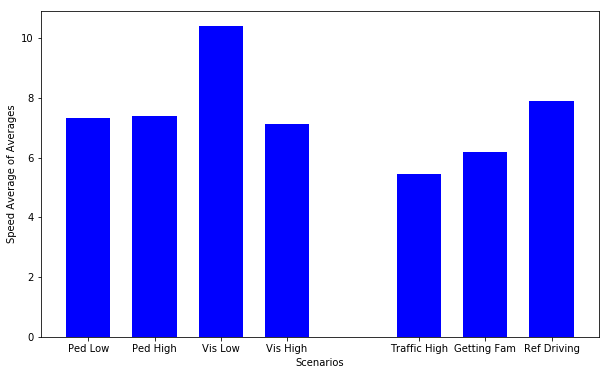

In [46]:
#dfGTA.groupby('scenario')['speed'].mean().plot()
speedAverageScenario = (dfGTA.groupby(['session_id', 'scenario'], as_index=False).mean()
            .groupby('scenario')['speed'].mean())
for data in speedAverageScenario:
    print data
labels = ["Ped Low","Ped High","Vis Low","Vis High","Traffic High","Getting Fam","Ref Driving"]
scenarios = [1,2,3,4,6,7,8]
plt.figure(figsize=(10, 6))
plot = plt.bar(scenarios, speedAverageScenario, 1/1.5, color="blue")
plt.xticks(scenarios, labels)
plt.ylabel("Speed Average of Averages")
plt.xlabel("Scenarios")
plt.savefig('speedAverageScenarios.pdf')

plt.show()

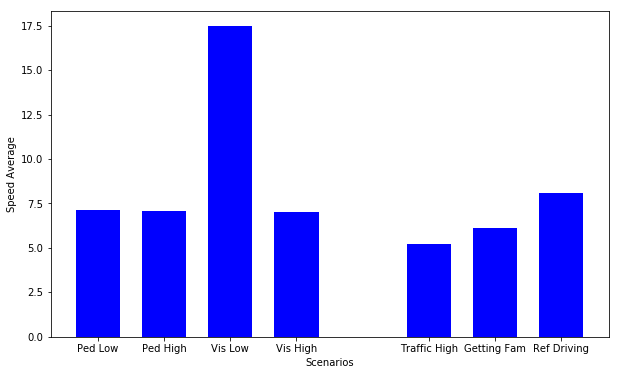

In [47]:
speedAverageScenario = dfGTA.groupby('scenario')['speed'].mean()
plt.figure(figsize=(10, 6))
plot = plt.bar(scenarios, speedAverageScenario, 1/1.5, color="blue")
plt.xticks(scenarios, labels)
plt.ylabel("Speed Average")
plt.xlabel("Scenarios")
plt.savefig('speedAverageScenarios.pdf')

plt.show()


NameError: name 'scenarios' is not defined

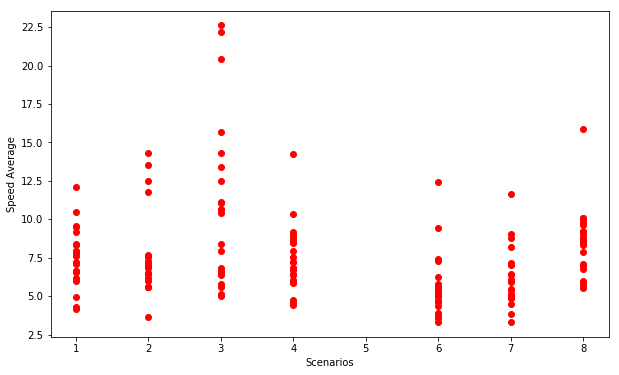

In [103]:
speedAverageScenario = (dfGTA.groupby(['session_id', 'scenario'], as_index=False)['speed'].mean())
plt.figure(figsize=(10, 6))
plt.plot(speedAverageScenario['scenario'], speedAverageScenario['speed'], 'ro')
plt.ylabel("Speed Average")
plt.xlabel("Scenarios")
plt.xticks(scenarios, labels)
plt.savefig('speedAverageScenarios.pdf')
plt.show()

In [4]:
cursor.execute('SELECT time, idsession, scenario,' +
               ' SUM(CASE data_type_id WHEN 1 THEN value ELSE 0 END) as posX,' +
               'SUM(CASE data_type_id WHEN 2 THEN value ELSE 0 END) as posY,' +
               ' SUM(CASE data_type_id WHEN 10 THEN value ELSE 0 END) as hadCollision,'+
               ' SUM(CASE data_type_id WHEN 17 THEN value ELSE 0 END) as pedId,'+
               ' SUM(CASE data_type_id WHEN 15 THEN value ELSE 0 END) as nextPedRunning,'+
               ' SUM(CASE data_type_id WHEN 11 THEN value ELSE 0 END) as distancePed,'+
                ' SUM(CASE data_type_id WHEN 8 THEN value ELSE 0 END) as speed,'+
                ' SUM(CASE data_type_id WHEN 12 THEN value ELSE 0 END) as posPedX,'+
                ' SUM(CASE data_type_id WHEN 13 THEN value ELSE 0 END) as posPedY,'+
               ' SUM(CASE data_type_id WHEN 596 THEN value ELSE 0 END) as currentDistance'+
               ' FROM datagta gta WHERE gta.idsession >= 144 AND gta.data_type_id in (1,2,8,10,11,12,13,15,17,596)'+
               ' AND gta.idsession not in (145,146,147,148,149,151,155,158,162,164)'+
               ' GROUP BY time, idsession, scenario;')
rows = cursor.fetchall()
timestamps = [row[0] for row in rows]
if (len(timestamps) == 0):
    print ("Something went wrong")
firstTime = timestamps[:1][0]
lastTime = timestamps[-1:][0]
dfGTA = pd.DataFrame(rows, index=timestamps)
#dfDiffGTA = dfGTA.diff()
dfGTA.columns=['time','session_id','scenario', 'Pos_X', 'Pos_Y', 'hadCollision', 'pedId', 'nextPedRunning', 'distancePed','speed', 'posPedX', 'posPedY' , 'currentDistance']
dfGTA


,time,session_id,scenario,Pos_X,Pos_Y,hadCollision,pedId,nextPedRunning,distancePed,speed,posPedX,posPedY,currentDistance
2017-10-04 12:46:18.071232,2017-10-04 12:46:18.071232,144,7,-975.749500,82.249620,0.0,17.0,0.0,70.352844,0.000000,154.041500,-23.487390,1253.502930
2017-10-04 12:46:18.258732,2017-10-04 12:46:18.258732,144,7,-975.703735,82.260506,0.0,17.0,0.0,70.352844,0.021795,154.041500,-23.487390,1253.459000
2017-10-04 12:46:18.279286,2017-10-04 12:46:18.279286,144,7,-975.707031,82.254620,0.0,17.0,0.0,70.352844,0.137319,154.041500,-23.487390,1253.461670
2017-10-04 12:46:18.298839,2017-10-04 12:46:18.298839,144,7,-975.708100,82.252920,0.0,17.0,0.0,70.352844,0.128202,154.041500,-23.487390,1253.462650
2017-10-04 12:46:18.315884,2017-10-04 12:46:18.315884,144,7,-975.709534,82.251180,0.0,17.0,0.0,70.352844,0.137845,154.041500,-23.487390,1253.464000
2017-10-04 12:46:18.341954,2017-10-04 12:46:18.341954,144,7,-975.711365,82.249176,0.0,17.0,0.0,70.352844,0.142761,154.041500,-23.487390,1253.465450
2017-10-04 12:46:18.359500,2017-10-04 12:46:18.359500,144,7,-975.713257,82.247340,0.0,17.0,0.0,70.352844,0.137215,154.041500,-23.487390,1253.467290
2017-10-04 12:46:18.374038,2017-10-04 12:46:18.374038,144,7,-975.714600,82.245980,0.0,17.0,0.0,70.352844,0.125940,154.041500,-23.487390,1253.468380
2017-10-04 12:46:18.392588,2017-10-04 12:46:18.392588,144,7,-975.716000,82.244530,0.0,17.0,0.0,70.352844,0.108481,154.041500,-23.487390,1253.469730
2017-10-04 12:46:18.413645,2017-10-04 12:46:18.413645,144,7,-975.717100,82.243340,0.0,17.0,0.0,70.352844,0.089678,154.041500,-23.487390,1253.470830


In [65]:
#dfGTA.columns=['time','session_id','scenario', 'Pos_X', 'Pos_Y', 'hadCollision', 'pedId', 'distancePed']

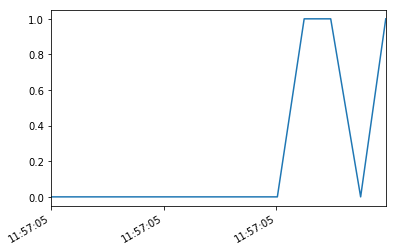

In [82]:
pedCollision = dfGTA[(dfGTA.session_id == 159) & (dfGTA.scenario == 3)  & (dfGTA.distancePed < 7) & (dfGTA.pedId == 16)]
pedCollision['hadCollision'].plot()
#df_joined[(df_joined.session_id == 2.0) & (df_joined.scenario == 2.0) & (df_joined.nextpedestrianid == 8.0)]

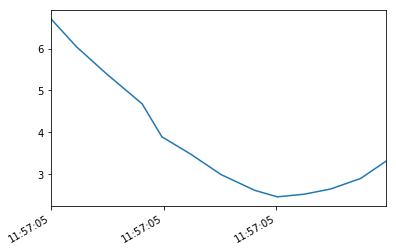

In [83]:
#dfGTA[(dfGTA.session_id == 144) & (dfGTA.scenario == 3) & (dfGTA.pedId == 0)]['distancePed'].plot()
pedCollision['distancePed'].plot()
#dfGTA['distancePed'].plot()

(144.0, 6.0, 8.0)
(152.0, 3.0, 8.0)
(172.0, 6.0, 8.0)


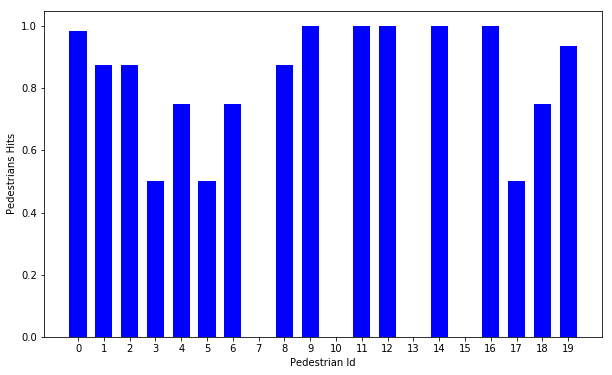

Pos_X Pos_Y hadCollision nextPedRunning distancePed  \
                          count count        count          count       count   
session_id scenario pedId                                                       
144.0      2.0      6.0       1     1            1              1           1   
                    12.0      1     1            1              1           1   
           6.0      8.0       1     1            1              1           1   
150.0      3.0      16.0      1     1            1              1           1   
           6.0      19.0      1     1            1              1           1   
152.0      1.0      17.0      1     1            1              1           1   
           3.0      8.0       1     1            1              1           1   
153.0      2.0      0.0       1     1            1              1           1   
                    17.0      1     1            1              1           1   
           6.0      17.0      1     1            1              1           1   
154.0      2.0      17.0      1     1            1              1           1   
           4.0      11.0      1     1            1              1           1   
           6.0      19.0      1     1            1              1           1   
156.0      2.0      17.0      1     1            1              1           1   
           4.0      16.0      1     1            1              1           1   
157.0      1.0      17.0      1     1            1              1           1   
           2.0      2.0       1     1            1              1           1   
                    4.0       1     1            1              1           1   
           6.0      17.0      1     1            1              1           1   
159.0      3.0      16.0      1     1            1              1           1   
           6.0      3.0       1     1            1              1           1   
160.0      1.0      17.0      1     1            1              1           1   
           2.0      17.0      1     1            1              1           1   
           6.0      17.0      1     1            1              1           1   
161.0      1.0      1.0       1     1            1              1           1   
                    17.0      1     1            1              1           1   
           3.0      16.0      1     1            1              1           1   
           4.0      16.0      1     1            1              1           1   
           6.0      17.0      1     1            1              1           1   
163.0      1.0      17.0      1     1            1              1           1   
...                         ...   ...          ...            ...         ...   
167.0      1.0      17.0      1     1            1              1           1   
           2.0      9.0       1     1            1              1           1   
168.0      2.0      17.0      1     1            1              1           1   
           3.0      16.0      1     1            1              1           1   
           6.0      17.0      1     1            1              1           1   
169.0      2.0      0.0       1     1            1              1           1   
                    2.0       1     1            1              1           1   
           3.0      0.0       1     1            1              1           1   
           4.0      16.0      1     1            1              1           1   
170.0      1.0      1.0       1     1            1              1           1   
           3.0      6.0       1     1            1              1           1   
           4.0      18.0      1     1            1              1           1   
           6.0      1.0       1     1            1              1           1   
171.0      2.0      0.0       1     1            1              1           1   
                    14.0      1     1            1              1           1   
                    19.0      1     1            1       

In [13]:
data = dfGTA[(dfGTA.distancePed < 7) & (dfGTA.hadCollision == True) & (dfGTA.scenario != 7) & (dfGTA.scenario != 8)]
data = data.groupby(['session_id', 'scenario', 'pedId'], as_index=False).mean()
data = data.groupby(['session_id', 'scenario', 'pedId']).agg(['count'])
pedsHit = []
for row in data.iterrows():
    session, scenario, ped = row[0]
    pedsHit.append((session, scenario, ped))
    if (ped == 8):
        print (row[0])
    
countHits = {}
countHits[10] = 0
countHits[7] = 0
countHits[13] = 0
countHits[15] = 0
ratePerPed = [2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 3, 2, 2]
for tupla in pedsHit:
    countHits[tupla[2]] = float(countHits.get(tupla[2], 0) + 1)/ratePerPed[int(tupla[2])]
    
lists = sorted(countHits.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(figsize=(10, 6))
plt.ylabel("Pedestrians Hits")
plt.xlabel("Pedestrian Id")
plt.xticks(range(0,20), range(0,20))
plt.bar(range(0,20), y ,1/1.5, color="blue")
#plt.savefig('PedestriansHitsRate.pdf')
plt.show()
data

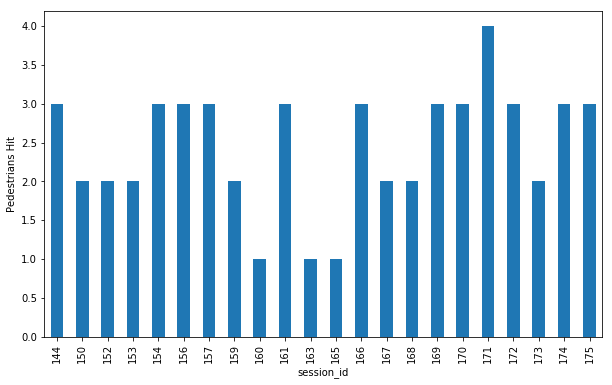

In [16]:
data = dfGTA[(dfGTA.distancePed < 7) & (dfGTA.hadCollision == True) & (dfGTA.scenario != 7) & (dfGTA.scenario != 8)]
#dataSessions = data.groupby(['session_id']).agg(['count'])
dataSessions = data.groupby(['session_id']).agg({"pedId": pd.Series.nunique, "hadCollision": 'count'})
#plt.

#dataSessions
#data['session_id'].drop_duplicates()
#data['session_id'].drop_duplicates()
plt.figure(figsize=(10, 6))
plt.ylabel("Pedestrians Hit")
plt.xlabel("Sessions")
#plt.savefig('PedestriansHitPerSession.pdf')
#dataSessions['pedId']['count'].plot.bar()
dataSessions['pedId'].plot.bar()
#plot = plt.bar(data['session_id'].drop_duplicates() ,dataSessions['hadCollision']['count'], 1/1.5, color="blue")
#plt.xticks(scenarios, labels)

#plt.savefig('PedestriansHitsPerSession.pdf')
#plt.show()

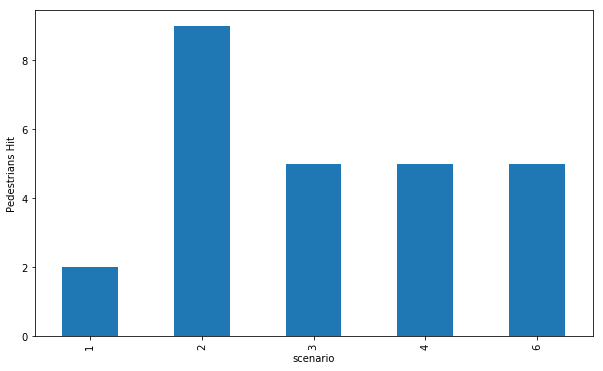

In [19]:
data = dfGTA[(dfGTA.distancePed < 7) & (dfGTA.hadCollision == True) & (dfGTA.scenario != 7) & (dfGTA.scenario != 8)]
dataSessions = data.groupby(['scenario']).agg({"pedId": pd.Series.nunique})
#plt.
labels = ["Ped Low","Ped High","Vis Low","Vis High","Traffic High"]
scenarios = [1,2,3,4,6]
#dataSessions
#data['session_id'].drop_duplicates()
#data['session_id'].drop_duplicates()
plt.figure(figsize=(10, 6))
plt.ylabel("Pedestrians Hit")
plt.xlabel("Scenarios")
#plt.xticks(scenarios, labels)
#plt.savefig('PedestriansHitPerScenario.pdf')
dataSessions['pedId'].plot(kind="bar", x="Scenarios")
#counts = pd.DataFrame(dataSessions['hadCollision'], columns=['count'])


#plt.bar(scenarios, dataSessions['hadCollision'] ,1/1.5, color="blue")

          pedId
scenario       
1           2.0
2           9.0
3           5.0
4           5.0
6           5.0


<Container object of 5 artists>

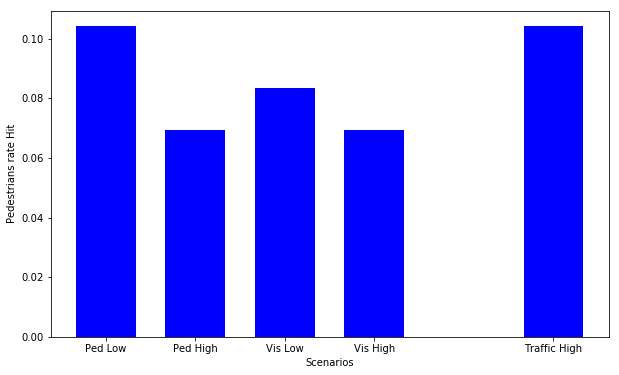

In [20]:
data = dfGTA[(dfGTA.distancePed < 7) & (dfGTA.hadCollision == True) & (dfGTA.scenario != 7) & (dfGTA.scenario != 8)]
dataSessions = data.groupby(['scenario']).agg({"pedId": pd.Series.nunique})
print dataSessions
labels = ["Ped Low","Ped High","Vis Low","Vis High","Traffic High"]
scenarios = [1,2,3,4,6]
rateHit = [10.0/(24*4), 20.0/(24*12) ,12.0/(24*6) ,10.0/(24*6) ,15.0/(24*6)]
plt.figure(figsize=(10, 6))
plt.ylabel("Pedestrians rate Hit")
plt.xlabel("Scenarios")
plt.xticks(scenarios, labels)
#plt.savefig('PedestriansHitRatePerScenario.pdf')
plt.bar(scenarios, rateHit ,1/1.5, color="blue")

In [5]:
cursor.execute('SELECT time, idsession, scenario,' +
               ' SUM(CASE data_type_id WHEN 1 THEN value ELSE 0 END) as Steering,' +
               'SUM(CASE data_type_id WHEN 2 THEN value ELSE 0 END) as Brake,' +
               ' SUM(CASE data_type_id WHEN 3 THEN value ELSE 0 END) as Throttle '+
               ' FROM datasteering gta WHERE gta.idsession >= 144 AND gta.data_type_id in (1,2,3)'+
               ' AND gta.idsession not in (145,146,147,148,149,151,155,158,162,164) '+
               ' GROUP BY time, idsession, scenario;')

In [6]:
rows = cursor.fetchall()
timestamps = [row[0] for row in rows]
timestamps

[datetime.datetime(2017, 10, 4, 12, 46, 17, 848640),
 datetime.datetime(2017, 10, 4, 12, 46, 17, 868694),
 datetime.datetime(2017, 10, 4, 12, 46, 17, 888776),
 datetime.datetime(2017, 10, 4, 12, 46, 17, 908800),
 datetime.datetime(2017, 10, 4, 12, 46, 17, 928867),
 datetime.datetime(2017, 10, 4, 12, 46, 17, 948906),
 datetime.datetime(2017, 10, 4, 12, 46, 17, 968961),
 datetime.datetime(2017, 10, 4, 12, 46, 17, 988512),
 datetime.datetime(2017, 10, 4, 12, 46, 18, 8565),
 datetime.datetime(2017, 10, 4, 12, 46, 18, 28618),
 datetime.datetime(2017, 10, 4, 12, 46, 18, 48674),
 datetime.datetime(2017, 10, 4, 12, 46, 18, 68725),
 datetime.datetime(2017, 10, 4, 12, 46, 18, 88780),
 datetime.datetime(2017, 10, 4, 12, 46, 18, 108861),
 datetime.datetime(2017, 10, 4, 12, 46, 18, 128885),
 datetime.datetime(2017, 10, 4, 12, 46, 18, 148940),
 datetime.datetime(2017, 10, 4, 12, 46, 18, 168992),
 datetime.datetime(2017, 10, 4, 12, 46, 18, 188544),
 datetime.datetime(2017, 10, 4, 12, 46, 18, 208599),

In [7]:
df_steer = pd.DataFrame(rows, index=timestamps)
df_steer.head()

,0,1,2,3,4,5
2017-10-04 12:46:17.848640,2017-10-04 12:46:17.848640,144,1,33096.0,65535.0,65535.0
2017-10-04 12:46:17.868694,2017-10-04 12:46:17.868694,144,1,33096.0,65535.0,65535.0
2017-10-04 12:46:17.888776,2017-10-04 12:46:17.888776,144,1,33096.0,65535.0,65535.0
2017-10-04 12:46:17.908800,2017-10-04 12:46:17.908800,144,1,33096.0,65535.0,65535.0
2017-10-04 12:46:17.928867,2017-10-04 12:46:17.928867,144,1,33096.0,65535.0,65535.0


In [8]:
df_steer.columns=['time','session_id','scenario', 'steering', 'brake',  'throttle']
df_steer.head()

,time,session_id,scenario,steering,brake,throttle
2017-10-04 12:46:17.848640,2017-10-04 12:46:17.848640,144,1,33096.0,65535.0,65535.0
2017-10-04 12:46:17.868694,2017-10-04 12:46:17.868694,144,1,33096.0,65535.0,65535.0
2017-10-04 12:46:17.888776,2017-10-04 12:46:17.888776,144,1,33096.0,65535.0,65535.0
2017-10-04 12:46:17.908800,2017-10-04 12:46:17.908800,144,1,33096.0,65535.0,65535.0
2017-10-04 12:46:17.928867,2017-10-04 12:46:17.928867,144,1,33096.0,65535.0,65535.0


In [9]:
freq_resample = '50000U'
df_steer = df_steer.resample(freq_resample).ffill()
df_steer.head()

,time,session_id,scenario,steering,brake,throttle
2017-10-04 12:46:17.800,NaT,NaN,NaN,NaN,NaN,NaN
2017-10-04 12:46:17.850,2017-10-04 12:46:17.848640,144.0,1.0,33096.0,65535.0,65535.0
2017-10-04 12:46:17.900,2017-10-04 12:46:17.888776,144.0,1.0,33096.0,65535.0,65535.0
2017-10-04 12:46:17.950,2017-10-04 12:46:17.948906,144.0,1.0,33096.0,65535.0,65535.0
2017-10-04 12:46:18.000,2017-10-04 12:46:17.988512,144.0,1.0,33096.0,65535.0,65535.0


In [10]:
freq_resample = '50000U'
dfGTA = dfGTA.resample(freq_resample).ffill()
dfGTA.head()


,time,session_id,scenario,Pos_X,Pos_Y,hadCollision,pedId,nextPedRunning,distancePed,speed,posPedX,posPedY,currentDistance
2017-10-04 12:46:18.050,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-04 12:46:18.100,2017-10-04 12:46:18.071232,144.0,7.0,-975.7495,82.24962,0.0,17.0,0.0,70.352844,0.0,154.0415,-23.48739,1253.50293
2017-10-04 12:46:18.150,2017-10-04 12:46:18.071232,144.0,7.0,-975.7495,82.24962,0.0,17.0,0.0,70.352844,0.0,154.0415,-23.48739,1253.50293
2017-10-04 12:46:18.200,2017-10-04 12:46:18.071232,144.0,7.0,-975.7495,82.24962,0.0,17.0,0.0,70.352844,0.0,154.0415,-23.48739,1253.50293
2017-10-04 12:46:18.250,2017-10-04 12:46:18.071232,144.0,7.0,-975.7495,82.24962,0.0,17.0,0.0,70.352844,0.0,154.0415,-23.48739,1253.50293


In [11]:
steer = df_steer.drop(df_steer.columns[[1, 2]], axis=1)
df_joined = pd.concat([dfGTA, steer], axis=1, join='inner')
df_joined.head()
#df_joined.to_csv("DataJoined.csv")

,time,session_id,scenario,Pos_X,Pos_Y,hadCollision,pedId,nextPedRunning,distancePed,speed,posPedX,posPedY,currentDistance,time,steering,brake,throttle
2017-10-04 12:46:18.050,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-04 12:46:18.048674,33096.0,65535.0,65535.0
2017-10-04 12:46:18.100,2017-10-04 12:46:18.071232,144.0,7.0,-975.7495,82.24962,0.0,17.0,0.0,70.352844,0.0,154.0415,-23.48739,1253.50293,2017-10-04 12:46:18.088780,33096.0,65535.0,65535.0
2017-10-04 12:46:18.150,2017-10-04 12:46:18.071232,144.0,7.0,-975.7495,82.24962,0.0,17.0,0.0,70.352844,0.0,154.0415,-23.48739,1253.50293,2017-10-04 12:46:18.148940,33096.0,65535.0,65535.0
2017-10-04 12:46:18.200,2017-10-04 12:46:18.071232,144.0,7.0,-975.7495,82.24962,0.0,17.0,0.0,70.352844,0.0,154.0415,-23.48739,1253.50293,2017-10-04 12:46:18.188544,33096.0,65535.0,65535.0
2017-10-04 12:46:18.250,2017-10-04 12:46:18.071232,144.0,7.0,-975.7495,82.24962,0.0,17.0,0.0,70.352844,0.0,154.0415,-23.48739,1253.50293,2017-10-04 12:46:18.248732,33096.0,65535.0,65535.0


In [91]:
#(144.0, 6.0, 8.0)
#(152.0, 3.0, 8.0)
#(172.0, 6.0, 8.0)

session2Scenario2 = df_joined[(df_joined.session_id == 144) & (df_joined.scenario == 6.0) & (df_joined.pedId == 8.0)]
session3Scenario2 = df_joined[(df_joined.session_id == 152.0) & (df_joined.scenario == 6.0) & (df_joined.pedId == 8.0)]
session1Scenario2 = df_joined[(df_joined.session_id == 172.0) & (df_joined.scenario == 6.0) & (df_joined.pedId == 8.0)]

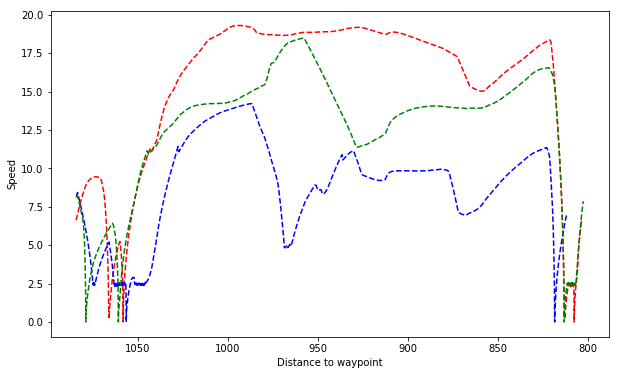

In [95]:
plt.figure(figsize=(10, 6))
plt.plot(session2Scenario2.currentDistance, session2Scenario2.speed, 'r--', session3Scenario2.currentDistance, session3Scenario2.speed, 'b--', session1Scenario2.currentDistance, session1Scenario2.speed, 'g--')
plt.ylabel("Speed")
plt.xlabel("Distance to waypoint")
plt.gca().invert_xaxis()
#plt.savefig('speed_distance.png')
plt.show()

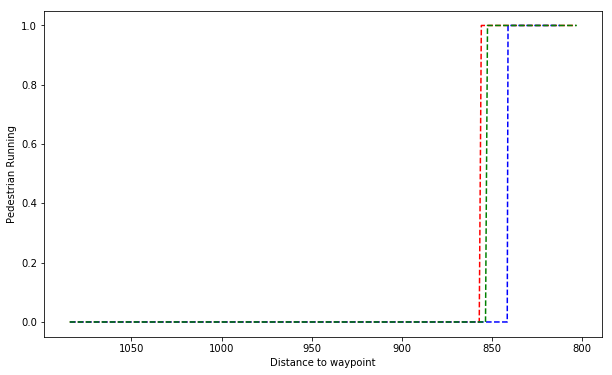

In [96]:
plt.figure(figsize=(10, 6))
plt.plot(session2Scenario2.currentDistance, session2Scenario2.nextPedRunning, 'r--', session3Scenario2.currentDistance, session3Scenario2.nextPedRunning, 'b--', session1Scenario2.currentDistance, session1Scenario2.nextPedRunning, 'g--')
plt.ylabel("Pedestrian Running")
plt.xlabel("Distance to waypoint")
plt.gca().invert_xaxis()
#plt.savefig('pedRunning_distance.png')
plt.show()

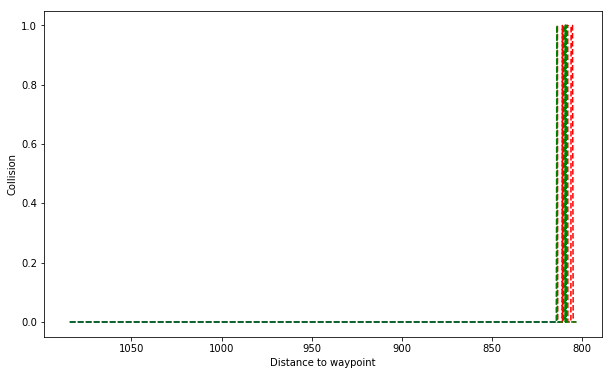

In [98]:
plt.figure(figsize=(10, 6))
plt.plot(session2Scenario2.currentDistance, session2Scenario2.hadCollision, 'r--', session3Scenario2.currentDistance, session3Scenario2.hadCollision, 'b--', session1Scenario2.currentDistance, session1Scenario2.hadCollision, 'g--')
plt.ylabel("Collision")
plt.xlabel("Distance to waypoint")
plt.gca().invert_xaxis()
#plt.savefig('collision_distance.png')
plt.show()

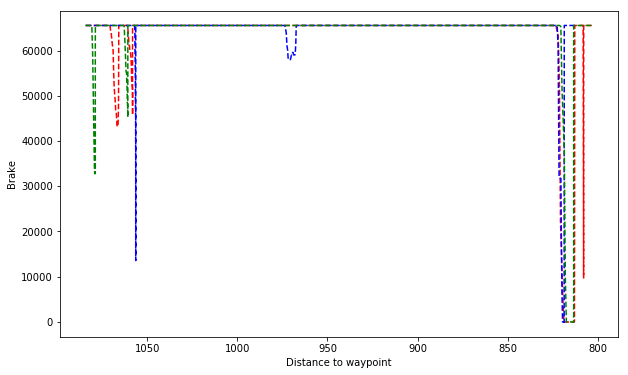

In [99]:
plt.figure(figsize=(10, 6))
plt.plot(session2Scenario2.currentDistance, session2Scenario2.brake, 'r--', session3Scenario2.currentDistance, session3Scenario2.brake, 'b--', session1Scenario2.currentDistance, session1Scenario2.brake, 'g--')

plt.ylabel("Brake")
plt.xlabel("Distance to waypoint")
plt.gca().invert_xaxis()
#plt.savefig('brake_distance.png')
plt.show()

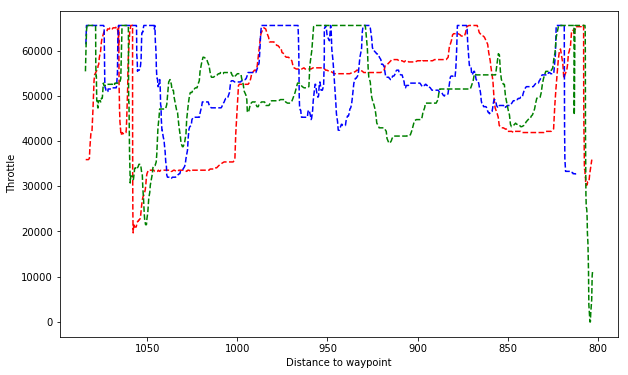

In [100]:
plt.figure(figsize=(10, 6))
plt.plot(session2Scenario2.currentDistance, session2Scenario2.throttle, 'r--', session3Scenario2.currentDistance, session3Scenario2.throttle, 'b--', session1Scenario2.currentDistance, session1Scenario2.throttle, 'g--')
plt.ylabel("Throttle")
plt.xlabel("Distance to waypoint")
plt.gca().invert_xaxis()
#plt.savefig('throttle_distance.png')
plt.show()

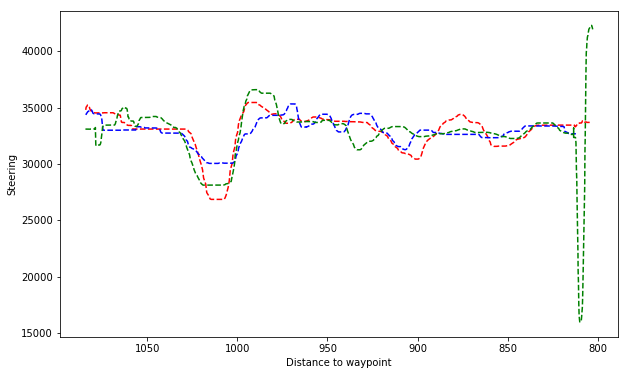

In [101]:
plt.figure(figsize=(10, 6))
plt.plot(session2Scenario2.currentDistance, session2Scenario2.steering, 'r--', session3Scenario2.currentDistance, session3Scenario2.steering, 'b--', session1Scenario2.currentDistance, session1Scenario2.steering, 'g--')
plt.ylabel("Steering")
plt.xlabel("Distance to waypoint")
plt.gca().invert_xaxis()
#plt.savefig('steering_distance.png')
plt.show()

In [96]:
scenario = 6
ped = 8
zoom2 = df_joined[(df_joined.session_id == 144) & (df_joined.scenario == scenario) & (df_joined.pedId == ped) & (df_joined.nextPedRunning == True) & (dfGTA.distancePed < 10) ]
zoom3 = df_joined[(df_joined.session_id == 152.0) & (df_joined.scenario == scenario) & (df_joined.pedId == ped) & (df_joined.nextPedRunning == True) & (dfGTA.distancePed < 10) ]
zoom1 = df_joined[(df_joined.session_id == 172.0) & (df_joined.scenario == scenario) & (df_joined.pedId == ped) & (df_joined.nextPedRunning == True) & (dfGTA.distancePed < 10) ]

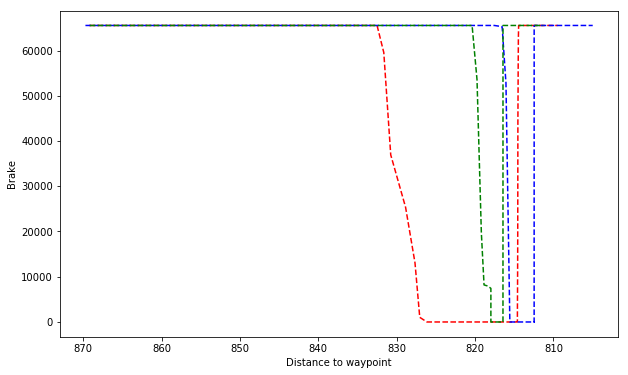

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(zoom2.currentDistance, zoom2.brake, 'r--', zoom3.currentDistance, zoom3.brake, 'b--', zoom1.currentDistance, zoom1.brake, 'g--')
plt.ylabel("Brake")
plt.xlabel("Distance to waypoint")
plt.gca().invert_xaxis()
#plt.savefig('brake_distance_zoom.png')
plt.show()

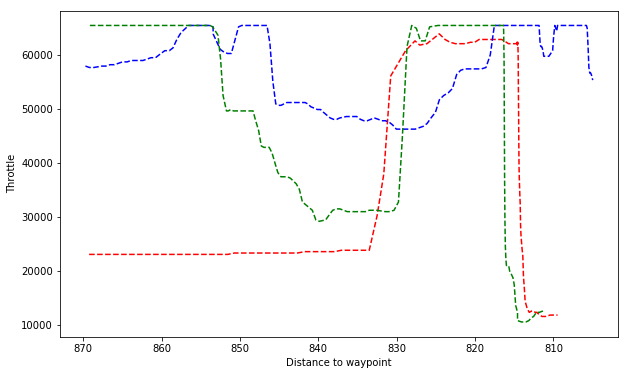

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(zoom2.currentDistance, zoom2.throttle, 'r--', zoom3.currentDistance, zoom3.throttle, 'b--', zoom1.currentDistance, zoom1.throttle, 'g--')
plt.ylabel("Throttle")
plt.xlabel("Distance to waypoint")
plt.gca().invert_xaxis()
#plt.savefig('throttle_distance_zoom.png')
plt.show()

-516.6332
122.394684
-515.051147
129.44075
-525.346558
128.120468
-522.8979
128.012177
-522.8979
128.012177
129.44075 122.394684 128.120468
SE CRUZA
0 days 00:00:01.239798


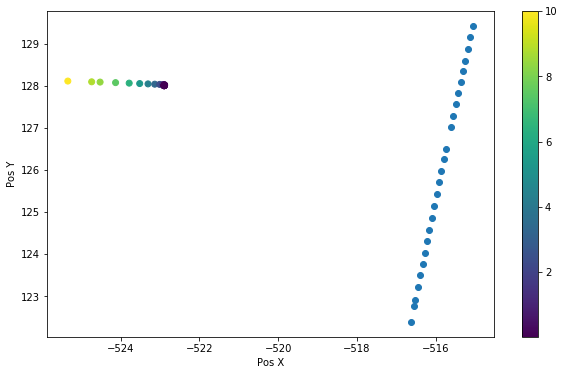

In [99]:
plt.figure(figsize=(10, 6))
dataZoom = zoom3
car = plt.scatter(dataZoom.Pos_X, dataZoom.Pos_Y, c=dataZoom.speed)
ped = plt.scatter(dataZoom.posPedX, dataZoom.posPedY, label="Ped")
plt.ylabel("Pos Y")
plt.xlabel("Pos X")
#plt.legend(ped, "Pos Ped")
print dataZoom.iloc[0][10]
print dataZoom.iloc[0][11]
print dataZoom.iloc[-1][10]
print dataZoom.iloc[-1][11]
print dataZoom.iloc[0][3]
print dataZoom.iloc[0][4]
print dataZoom.iloc[-1][3]
print dataZoom.iloc[-1][4]
puntoMedio = ((dataZoom.iloc[-1][3] + dataZoom.iloc[0][3])/2, (dataZoom.iloc[-1][4] + dataZoom.iloc[0][4])/2)
puntoMedio = (dataZoom.iloc[0][3], dataZoom.iloc[0][4])
print dataZoom.iloc[-1][3]
print dataZoom.iloc[-1][4]
if (dataZoom.iloc[0][10] > dataZoom.iloc[-1][10]):
    maxX = dataZoom.iloc[0][10]
    minX = dataZoom.iloc[-1][10]
else:
    minX = dataZoom.iloc[0][10]
    maxX = dataZoom.iloc[-1][10]
if (dataZoom.iloc[0][11] > dataZoom.iloc[-1][11]):
    maxY = dataZoom.iloc[0][11]
    minY = dataZoom.iloc[-1][11]
else:
    minY = dataZoom.iloc[0][11]
    maxY = dataZoom.iloc[-1][11]
print maxY, minY, puntoMedio[1] 
if (minX <= puntoMedio[0] <= maxX or minY <= puntoMedio[1] <= maxY):
    print "SE CRUZA"
else:
    print "NO SE CRUZA"
print dataZoom.iloc[-1][0] - dataZoom.iloc[0][0]
plt.colorbar(car)
#plt.savefig('positions_speed_red.png')
plt.show()

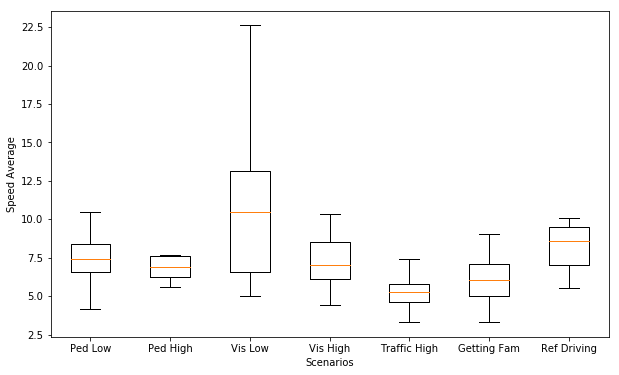

In [109]:
# don't show outlier points
#speedAverageScenario
labels = ["Ped Low","Ped High","Vis Low","Vis High","Traffic High","Getting Fam","Ref Driving"]
scenarios = [1,2,3,4,6,7,8]
#speedAverageScenario[speedAverageScenario.scenario == 1]
datos = []
for scenario in scenarios:
    datos.append(speedAverageScenario[speedAverageScenario.scenario == scenario]['speed'])

speedAverageScenario = (dfGTA.groupby(['session_id', 'scenario'], as_index=False)['speed'].mean())
#data = np.concatenate((speedAverageScenario['scenario'], speedAverageScenario['speed']), 0)
#plt.boxplot(data, 0, '')
plt.figure(figsize=(10, 6))
plt.boxplot(datos,0, '')
plt.ylabel("Speed Average")
plt.xlabel("Scenarios")
plt.xticks([1,2,3,4,5,6,7], labels)
#plt.savefig('speedAverageScenariosBoxPlot.pdf')
plt.show()

In [23]:
#speedAverageScenario
labels = ["Ped Low","Ped High","Vis Low","Vis High","Traffic High","Getting Fam","Ref Driving"]
scenarios = [1,2,3,4,6,7,8]

In [105]:
speedAverageScenario[speedAverageScenario.scenario == 1]
datos = []
for scenario in scenarios:
    datos.append(speedAverageScenario[speedAverageScenario.scenario == scenario]['speed'])

NameError: name 'scenarios' is not defined

In [14]:
#speedAverageScenario
rateHit = [10.0/(24*4), 20.0/(24*12) ,12.0/(24*6) ,10.0/(24*6), 0 ,15.0/(24*6)]
pedHitPerSession = {}
for pedHit in pedsHit:
    session, scenario, pedId = pedHit
    if (pedId == 16 or pedId == 17):
        continue
    if session in pedHitPerSession:
        if scenario in pedHitPerSession[session]:
            pedHitPerSession[session][scenario] += rateHit[int(scenario-1)]
        else:
            pedHitPerSession[session][scenario] = rateHit[int(scenario-1)]
    else:
        pedHitPerSession[session] = {}
        pedHitPerSession[session][scenario] = rateHit[int(scenario-1)]
        
pedsHit
#pedHitPerSession

[(144.0, 2.0, 6.0),
 (144.0, 2.0, 12.0),
 (144.0, 6.0, 8.0),
 (150.0, 3.0, 16.0),
 (150.0, 6.0, 19.0),
 (152.0, 1.0, 17.0),
 (152.0, 3.0, 8.0),
 (153.0, 2.0, 0.0),
 (153.0, 2.0, 17.0),
 (153.0, 6.0, 17.0),
 (154.0, 2.0, 17.0),
 (154.0, 4.0, 11.0),
 (154.0, 6.0, 19.0),
 (156.0, 2.0, 17.0),
 (156.0, 4.0, 16.0),
 (157.0, 1.0, 17.0),
 (157.0, 2.0, 2.0),
 (157.0, 2.0, 4.0),
 (157.0, 6.0, 17.0),
 (159.0, 3.0, 16.0),
 (159.0, 6.0, 3.0),
 (160.0, 1.0, 17.0),
 (160.0, 2.0, 17.0),
 (160.0, 6.0, 17.0),
 (161.0, 1.0, 1.0),
 (161.0, 1.0, 17.0),
 (161.0, 3.0, 16.0),
 (161.0, 4.0, 16.0),
 (161.0, 6.0, 17.0),
 (163.0, 1.0, 17.0),
 (163.0, 2.0, 17.0),
 (163.0, 6.0, 17.0),
 (165.0, 1.0, 17.0),
 (166.0, 3.0, 4.0),
 (166.0, 4.0, 18.0),
 (166.0, 6.0, 17.0),
 (167.0, 1.0, 17.0),
 (167.0, 2.0, 9.0),
 (168.0, 2.0, 17.0),
 (168.0, 3.0, 16.0),
 (168.0, 6.0, 17.0),
 (169.0, 2.0, 0.0),
 (169.0, 2.0, 2.0),
 (169.0, 3.0, 0.0),
 (169.0, 4.0, 16.0),
 (170.0, 1.0, 1.0),
 (170.0, 3.0, 6.0),
 (170.0, 4.0, 18.0),
 (170.0

In [15]:
speedAverageScenario = (dfGTA.groupby(['session_id', 'scenario'], as_index=False)['speed'].mean())
speeds = []
speedsPerScenario = {}
pedRatePerScenario = {}
pedRates = []
scenariosSpeedPed = []
for fila in speedAverageScenario.iterrows():
    idfila, filacompleta = fila
    session = filacompleta[0]
    scenario = filacompleta[1]
    speed = filacompleta[2]
    speeds.append(speed)
    rate = pedHitPerSession.get(session, 0)
    if (rate != 0):
        rate = rate.get(scenario, 0)
    pedRates.append(rate)
    scenariosSpeedPed.append(scenario)
    if scenario in speedsPerScenario:
        lista = (speedsPerScenario[scenario])
        #print type(lista)
        lista.append(speed)
        speedsPerScenario[scenario] = lista
    else:
        speedsPerScenario[scenario] = [speed]
    if scenario in pedRatePerScenario:
        lista = pedRatePerScenario[scenario]
        lista.append(rate)
        pedRatePerScenario[scenario] = lista
    else:
        pedRatePerScenario[scenario] = [rate]
    #speedsPerScenario[scenario] = (speedsPerScenario.get(scenario, [])).append(speed)
    #pedRatePerScenario[scenario] = (pedRatePerScenario.get(scenario, [])).append(rate)
    


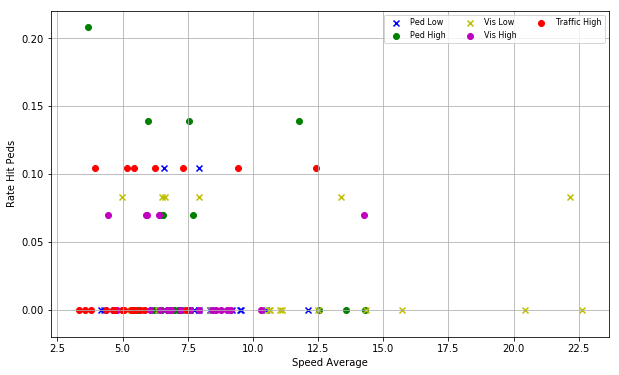

In [78]:
#speedAverageScenario = (dfGTA.groupby(['session_id', 'scenario'], as_index=False)['speed'].mean())
plt.figure(figsize=(10, 6))
#plt.plot(speeds, pedRates, 'ro')
plt.xlabel("Speed Average")
plt.ylabel("Rate Hit Peds")
#for key, value in sorted(speedsPerScenario.iteritems()):
colors = ['b', 'g', 'y', 'm', 'r']
lo = plt.scatter(speedsPerScenario[1], pedRatePerScenario[1], marker='x', color=colors[0])
ll = plt.scatter(speedsPerScenario[2], pedRatePerScenario[2], marker='o', color=colors[1])
l  = plt.scatter(speedsPerScenario[3], pedRatePerScenario[3], marker='x', color=colors[2])
a  = plt.scatter(speedsPerScenario[4], pedRatePerScenario[4], marker='o', color=colors[3])
h  = plt.scatter(speedsPerScenario[6], pedRatePerScenario[6], marker='o', color=colors[4])

plt.legend((lo, ll, l, a, h),
           ("Ped Low","Ped High","Vis Low","Vis High","Traffic High"),
           scatterpoints=1,
           ncol=3,
           fontsize=8)
    
#plt.scatter(speeds,pedRates,c=scenariosSpeedPed, label=['Low Peds','High Peds',3,4,6,7,8])
#plt.legend(('Low Outlier', 'LoLo', 'Lo', 'Average', 'Hi', 'HiHi', 'High Outlier'), scatterpoints=1,
#           loc='lower left',
#           ncol=3,
#           fontsize=8)
#plt.legend(('Low Peds', 'High Peds', 'Lo', 'Average', 'Hi', 'HiHi', 'High Outlier'), scatterpoints=1)
plt.grid(True)
#plt.xticks(scenarios, labels)
#plt.savefig('speedAverageScenariosAndRateHits.pdf')
plt.show()

In [41]:
df_joined.corr()

,session_id,scenario,Pos_X,Pos_Y,hadCollision,pedId,nextPedRunning,distancePed,speed,posPedX,posPedY,currentDistance,steering,brake,throttle
session_id,1.000000,-0.053896,0.098865,-0.112153,-0.015923,0.075833,0.094089,-0.051549,0.088328,0.067899,-0.220189,-0.099316,0.391154,-0.196865,0.247868
scenario,-0.053896,1.000000,-0.449950,0.467384,0.023802,-0.555903,-0.466058,-0.033304,-0.202537,-0.171338,0.230807,0.446797,-0.091031,-0.170395,0.003057
Pos_X,0.098865,-0.449950,1.000000,-0.918379,-0.045950,0.804528,0.734835,-0.349233,0.317975,0.823997,-0.815537,-0.999871,0.143940,0.177003,0.022993
Pos_Y,-0.112153,0.467384,-0.918379,1.000000,0.053753,-0.736202,-0.822517,0.478549,-0.329488,-0.740883,0.837247,0.917027,-0.154150,-0.185705,-0.024004
hadCollision,-0.015923,0.023802,-0.045950,0.053753,1.000000,-0.042796,-0.031501,0.003696,-0.030487,-0.039662,0.047094,0.045453,-0.019763,-0.037517,0.002028
pedId,0.075833,-0.555903,0.804528,-0.736202,-0.042796,1.000000,0.709262,-0.030144,0.264834,0.780278,-0.744355,-0.803030,0.125782,0.140849,0.016746
nextPedRunning,0.094089,-0.466058,0.734835,-0.822517,-0.031501,0.709262,1.000000,-0.495955,0.317709,0.588436,-0.670369,-0.729224,0.157226,0.179050,0.014827
distancePed,-0.051549,-0.033304,-0.349233,0.478549,0.003696,-0.030144,-0.495955,1.000000,-0.163019,-0.174145,0.282554,0.348963,-0.089204,-0.038769,-0.020687
speed,0.088328,-0.202537,0.317975,-0.329488,-0.030487,0.264834,0.317709,-0.163019,1.000000,0.262100,-0.292362,-0.314687,0.496311,-0.153140,-0.240859
posPedX,0.067899,-0.171338,0.823997,-0.740883,-0.039662,0.780278,0.588436,-0.174145,0.262100,1.000000,-0.907817,-0.823964,0.109796,0.087019,0.019469


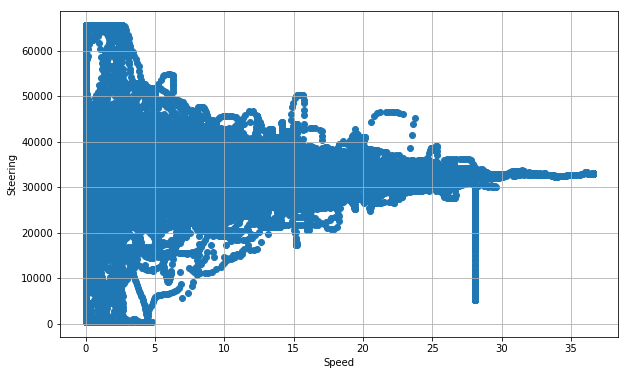

In [135]:
plt.figure(figsize=(10, 6))
#plt.plot(speeds, pedRates, 'ro')
plt.xlabel("Speed")
plt.ylabel("Steering")
plt.scatter(df_joined['speed'],df_joined['steering'])
#plt.legend(('Low Outlier', 'LoLo', 'Lo', 'Average', 'Hi', 'HiHi', 'High Outlier'), scatterpoints=1,
#           loc='lower left',
#           ncol=3,
#           fontsize=8)
#plt.legend(('Low Outlier', 'LoLo', 'Lo', 'Average', 'Hi', 'HiHi', 'High Outlier'), scatterpoints=1)
plt.grid(True)
#plt.xticks(scenarios, labels)
plt.savefig('correlationSteeringSpeed.pdf')
plt.show()

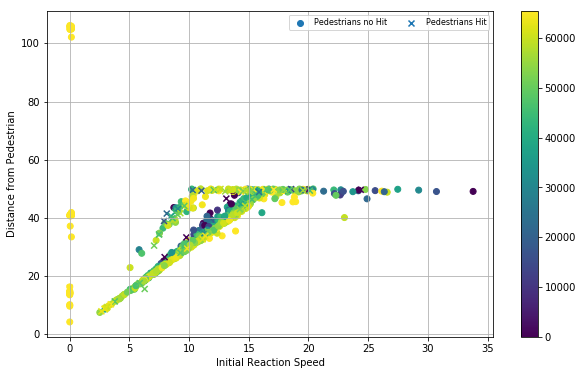

In [16]:
dataGTARunning = df_joined[(df_joined.nextPedRunning == True) & (df_joined.scenario != 7) & (df_joined.scenario != 8)]
dataGTARunning = dataGTARunning.groupby(['session_id', 'scenario', 'pedId'], as_index=False).first()

dataSpeedHit = []
dataDistanceHit = []
throttleHit = []
dataSpeedNoHit = []
dataDistanceNoHit = []
throttleNoHit = []

for filaRun in dataGTARunning.iterrows():
    session = filaRun[1][0]
    scenario = filaRun[1][1]
    pedId = filaRun[1][2]
    speed = filaRun[1][9]
    throttle = filaRun[1][16]
    distancePed = filaRun[1][8]
    if (session, scenario, pedId) in pedsHit:
        dataSpeedHit.append(speed)
        dataDistanceHit.append(distancePed)
        throttleHit.append(throttle)
    else:
        dataSpeedNoHit.append(speed)
        dataDistanceNoHit.append(distancePed)
        throttleNoHit.append(throttle)
        


plt.figure(figsize=(10, 6))
plt.xlabel("Initial Reaction Speed")
plt.ylabel("Distance from Pedestrian")
colors = ['b', 'g', 'y', 'm', 'r']

noHits = plt.scatter(dataSpeedNoHit, dataDistanceNoHit, marker='o', c=throttleNoHit)
hits = plt.scatter(dataSpeedHit, dataDistanceHit, marker='x', c=throttleHit) 
#'^'


plt.legend(( noHits, hits),
           ("Pedestrians no Hit","Pedestrians Hit"),
           scatterpoints=1,
           ncol=3,
           fontsize=8)
    
#plt.scatter(speeds,pedRates,c=scenariosSpeedPed, label=['Low Peds','High Peds',3,4,6,7,8])
#plt.legend(('Low Outlier', 'LoLo', 'Lo', 'Average', 'Hi', 'HiHi', 'High Outlier'), scatterpoints=1,
#           loc='lower left',
#           ncol=3,
#           fontsize=8)
#plt.legend(('Low Peds', 'High Peds', 'Lo', 'Average', 'Hi', 'HiHi', 'High Outlier'), scatterpoints=1)
plt.grid(True)
plt.colorbar(noHits)
#plt.colorbar(hits)
#plt.xticks(scenarios, labels)
#plt.savefig('InitialSpeedDistanceFromPedThrottle.pdf')
plt.show()

In [17]:
pedCross = dfGTA[(dfGTA.nextPedRunning == True) & (dfGTA.distancePed < 20)  & (dfGTA.scenario != 7) & (dfGTA.scenario != 8)]
firstPedCross = pedCross.groupby(['session_id', 'scenario', 'pedId'], as_index=False).first()
lastPedCross = pedCross.groupby(['session_id', 'scenario', 'pedId'], as_index=False).last()
lastPedCross


def pedCross(midPoint, PedPosIniX,PedPosIniY , PedPosFinX,PedPosFinY ):
    if (PedPosIniX > PedPosFinX):
        maxX = PedPosIniX
        minX = PedPosFinX
    else:
        minX = PedPosIniX
        maxX = PedPosFinX
    if (PedPosIniY > PedPosFinY):
        maxY = PedPosIniY
        minY = PedPosFinY
    else:
        minY = PedPosIniY
        maxY = PedPosFinY
    if (minX <= midPoint[0] <= maxX or minY <= midPoint[1] <= maxY):
        return True
    return False

pedInfo = []

for filaPedCross in firstPedCross.iterrows():
    session = filaPedCross[1][0]
    scenario = filaPedCross[1][1]
    pedId = filaPedCross[1][2]
    posx = filaPedCross[1][4]
    posy = filaPedCross[1][5]
    posPedIniX = filaPedCross[1][10]
    posPedIniY = filaPedCross[1][11]
    posPedFinX = lastPedCross[(lastPedCross.session_id == session) & (lastPedCross.pedId == pedId)  & (lastPedCross.scenario == scenario)]["posPedX"]
    posPedFinY = lastPedCross[(lastPedCross.session_id == session) & (lastPedCross.pedId == pedId)  & (lastPedCross.scenario == scenario)]["posPedY"]
    
    posPedFinX2 = posPedFinX.iloc[0]
    posPedFinY2 = posPedFinY.iloc[0]
    #print posPedFinX2, posPedFinY2
    pedHit = ((session, scenario, pedId) in pedsHit)
    pedCrossed = pedCross([posx, posy], posPedIniX, posPedIniY, posPedFinX2, posPedFinY2)
    tupla = (session,scenario,pedId,pedHit, pedCrossed)
    pedInfo.append(tupla)
    
pedInfo
#tuplelist2dict = {a: rest for a, *rest in pedInfo}
#tuplelist2dict
#lastPedCross[(lastPedCross.session_id == 144) & (lastPedCross.pedId == 3)  & (lastPedCross.scenario == 1)]["Pos_X"]

[(144.0, 1.0, 1.0, False, True),
 (144.0, 1.0, 3.0, False, False),
 (144.0, 1.0, 15.0, False, False),
 (144.0, 1.0, 17.0, False, True),
 (144.0, 2.0, 0.0, False, False),
 (144.0, 2.0, 2.0, False, False),
 (144.0, 2.0, 4.0, False, True),
 (144.0, 2.0, 5.0, False, False),
 (144.0, 2.0, 6.0, True, True),
 (144.0, 2.0, 7.0, False, True),
 (144.0, 2.0, 9.0, False, False),
 (144.0, 2.0, 10.0, False, False),
 (144.0, 2.0, 12.0, True, True),
 (144.0, 2.0, 14.0, False, False),
 (144.0, 2.0, 17.0, False, True),
 (144.0, 2.0, 19.0, False, False),
 (144.0, 3.0, 0.0, False, False),
 (144.0, 3.0, 4.0, False, True),
 (144.0, 3.0, 6.0, False, True),
 (144.0, 3.0, 8.0, False, True),
 (144.0, 3.0, 16.0, False, False),
 (144.0, 3.0, 18.0, False, True),
 (144.0, 4.0, 2.0, False, False),
 (144.0, 4.0, 5.0, False, False),
 (144.0, 4.0, 11.0, False, True),
 (144.0, 4.0, 13.0, False, False),
 (144.0, 4.0, 16.0, False, False),
 (144.0, 4.0, 18.0, False, False),
 (144.0, 6.0, 1.0, False, False),
 (144.0, 6.0, 3

In [22]:
i = 0
pedInfoRateCrossed = []
hitCrossPerSession = {}
while (i < len(pedInfo)):
    session = pedInfo[i][0]
    sessionAct = pedInfo[i][0]
    hitCrossPerSession[sessionAct] = {}
    while (sessionAct == session):
        scenario = pedInfo[i][1]
        scenarioAct = pedInfo[i][1]
        hitCrossPerSession[sessionAct][scenarioAct] = {}
        totalHits = 0
        totalCrossed = 0
        while (scenario == scenarioAct): 
            if (pedInfo[i][2] == 16 or pedInfo[i][2] == 17):
                i += 1
                continue
            hitCrossPerSession[sessionAct][scenarioAct][pedInfo[i][2]] = (pedInfo[i][3], pedInfo[i][4])
            if (pedInfo[i][3]):
                totalHits += 1
            if (pedInfo[i][4]):
                totalCrossed += 1
            i += 1
            if (i >= len(pedInfo)):
                break
            scenarioAct = pedInfo[i][1]
        if (totalCrossed != 0):
            pedInfoRateCrossed.append((session, scenario, float(totalHits)/totalCrossed))
        if (i >= len(pedInfo)):
                break
        sessionAct = pedInfo[i][0]
pedInfoRateCrossedPerScenario = [[], [], [], [], [], [], []]
pedInfoSpeedCrossedPerScenario = [[], [], [], [], [], [], []]

for rates in pedInfoRateCrossed:
    pedInfoRateCrossedPerScenario[int(rates[1])].append(rates[2])

#print len(pedInfoRateCrossedPerScenario[1])
#print len(speedsPerScenario[1])
#speedsPerScenario
hitCrossPerSession

{144.0: {1.0: {0.0: (False, False),
   1.0: (False, True),
   3.0: (False, False),
   15.0: (False, False)},
  2.0: {2.0: (False, False),
   4.0: (False, True),
   5.0: (False, False),
   6.0: (True, True),
   7.0: (False, True),
   9.0: (False, False),
   10.0: (False, False),
   12.0: (True, True),
   14.0: (False, False),
   19.0: (False, False)},
  3.0: {0.0: (False, False),
   4.0: (False, True),
   6.0: (False, True),
   8.0: (False, True),
   18.0: (False, True)},
  4.0: {2.0: (False, False),
   5.0: (False, False),
   11.0: (False, True),
   13.0: (False, False),
   18.0: (False, False)},
  6.0: {1.0: (False, False),
   3.0: (False, True),
   8.0: (True, False),
   10.0: (False, True),
   19.0: (False, True)}},
 150.0: {1.0: {0.0: (False, True),
   1.0: (False, True),
   3.0: (False, True),
   15.0: (False, True)},
  2.0: {2.0: (False, True),
   4.0: (False, True),
   5.0: (False, False),
   6.0: (False, False),
   7.0: (False, True),
   9.0: (False, True),
   10.0: (False, Tru

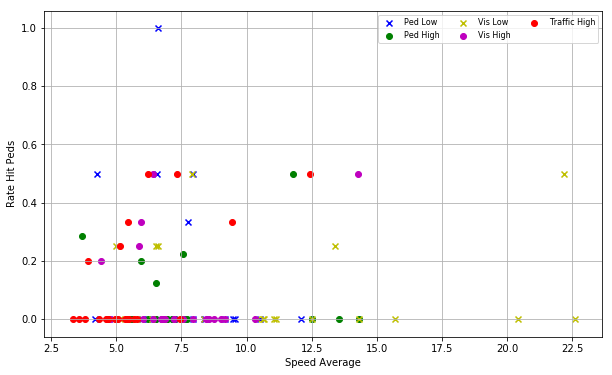

In [35]:
plt.figure(figsize=(10, 6))
#plt.plot(speeds, pedRates, 'ro')
plt.xlabel("Speed Average")
plt.ylabel("Rate Hit Peds")
#for key, value in sorted(speedsPerScenario.iteritems()):
colors = ['b', 'g', 'y', 'm', 'r']
lo = plt.scatter(speedsPerScenario[1], pedInfoRateCrossedPerScenario[1], marker='x', color=colors[0])
ll = plt.scatter(speedsPerScenario[2], pedInfoRateCrossedPerScenario[2], marker='o', color=colors[1])
l  = plt.scatter(speedsPerScenario[3], pedInfoRateCrossedPerScenario[3], marker='x', color=colors[2])
a  = plt.scatter(speedsPerScenario[4], pedInfoRateCrossedPerScenario[4], marker='o', color=colors[3])
h  = plt.scatter(speedsPerScenario[6], pedInfoRateCrossedPerScenario[6], marker='o', color=colors[4])

plt.legend((lo, ll, l, a, h),
           ("Ped Low","Ped High","Vis Low","Vis High","Traffic High"),
           scatterpoints=1,
           ncol=3,
           fontsize=8)
    
#plt.scatter(speeds,pedRates,c=scenariosSpeedPed, label=['Low Peds','High Peds',3,4,6,7,8])
#plt.legend(('Low Outlier', 'LoLo', 'Lo', 'Average', 'Hi', 'HiHi', 'High Outlier'), scatterpoints=1,
#           loc='lower left',
#           ncol=3,
#           fontsize=8)
#plt.legend(('Low Peds', 'High Peds', 'Lo', 'Average', 'Hi', 'HiHi', 'High Outlier'), scatterpoints=1)
plt.grid(True)
#plt.xticks(scenarios, labels)
#plt.savefig('speedAverageScenariosAndNewRateHitsWithoutDogs.pdf')
plt.show()

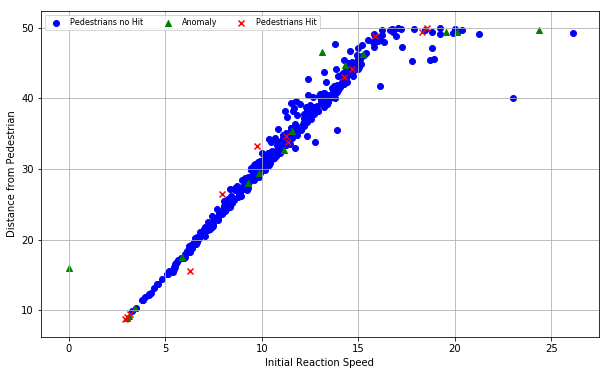

In [23]:
dataGTARunning = df_joined[(df_joined.nextPedRunning == True) & (df_joined.scenario != 7) & (df_joined.scenario != 8)]
dataGTARunning = dataGTARunning.groupby(['session_id', 'scenario', 'pedId'], as_index=False).first()

dataSpeedHit = []
dataDistanceHit = []
throttleHit = []
dataSpeedNoHit = []
dataDistanceNoHit = []
throttleNoHit = []
dataSpeedAlmostHit = []
dataDistanceAlmostHit = []
throttleAlmostHit = []

for filaRun in dataGTARunning.iterrows():
    session = filaRun[1][0]
    scenario = filaRun[1][1]
    pedId = filaRun[1][2]
    speed = filaRun[1][9]
    throttle = filaRun[1][16]
    distancePed = filaRun[1][8]
    try:
        hitCrossed = hitCrossPerSession[session][scenario][pedId]
    except KeyError:
        continue
    if (pedId == 16 or pedId == 17):
        continue
    if (hitCrossed[0] == False and hitCrossed[1] == False):
        continue
    if (hitCrossed[0] == False and hitCrossed[1] == True):
        dataSpeedNoHit.append(speed)
        dataDistanceNoHit.append(distancePed)
        throttleNoHit.append(throttle)
        continue
    if (hitCrossed[0] == True and hitCrossed[1] == False):
        dataSpeedAlmostHit.append(speed)
        dataDistanceAlmostHit.append(distancePed)
        throttleAlmostHit.append(throttle)
        continue
    if (hitCrossed[0] == True and hitCrossed[1] == True):
        dataSpeedHit.append(speed)
        dataDistanceHit.append(distancePed)
        throttleHit.append(throttle)
        continue

        


plt.figure(figsize=(10, 6))
plt.xlabel("Initial Reaction Speed")
plt.ylabel("Distance from Pedestrian")
colors = ['b', 'g', 'y', 'm', 'r']

noHits = plt.scatter(dataSpeedNoHit, dataDistanceNoHit, marker='o', c='b')
Almosthits = plt.scatter(dataSpeedAlmostHit, dataDistanceAlmostHit, marker='^', c='g')
hits = plt.scatter(dataSpeedHit, dataDistanceHit, marker='x', c='r')
 
#'^'


plt.legend(( noHits, Almosthits,  hits),
           ("Pedestrians no Hit", "Anomaly" ,"Pedestrians Hit"),
           scatterpoints=1,
           ncol=3,
           fontsize=8)
    
#plt.scatter(speeds,pedRates,c=scenariosSpeedPed, label=['Low Peds','High Peds',3,4,6,7,8])
#plt.legend(('Low Outlier', 'LoLo', 'Lo', 'Average', 'Hi', 'HiHi', 'High Outlier'), scatterpoints=1,
#           loc='lower left',
#           ncol=3,
#           fontsize=8)
#plt.legend(('Low Peds', 'High Peds', 'Lo', 'Average', 'Hi', 'HiHi', 'High Outlier'), scatterpoints=1)
plt.grid(True)

#plt.colorbar(noHits)

#plt.colorbar(hits)
#plt.xticks(scenarios, labels)
#plt.savefig('InitialSpeedDistanceFromPedNewRateWithoutDogs.pdf')
plt.show()

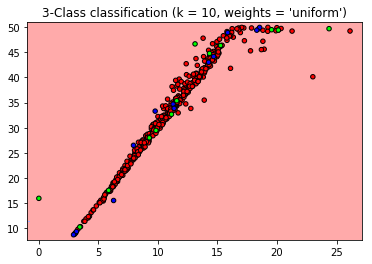

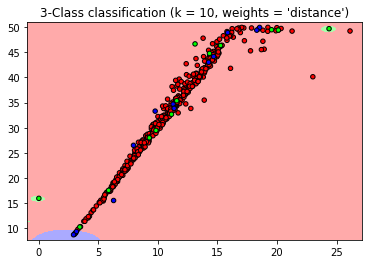

In [60]:
n_neighbors = 10

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target


#noHits = plt.scatter(dataSpeedNoHit, dataDistanceNoHit, marker='o', c='b')
#Almosthits = plt.scatter(dataSpeedAlmostHit, dataDistanceAlmostHit, marker='^', c='g')
#hits = plt.scatter(dataSpeedHit, dataDistanceHit, marker='x', c='r')
X = []

y = []
for i in range(0, len(dataSpeedNoHit)):
    X.append([dataSpeedNoHit[i],dataDistanceNoHit[i]])
    y.append(0)
for i in range(0, len(dataSpeedAlmostHit)):
    X.append([dataSpeedAlmostHit[i],dataDistanceAlmostHit[i]])
    y.append(1)
for i in range(0, len(dataSpeedHit)):
    X.append([dataSpeedHit[i],dataDistanceHit[i]])
    y.append(2)
    
X = np.float32(X)
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [56]:
X = np.float32(X)

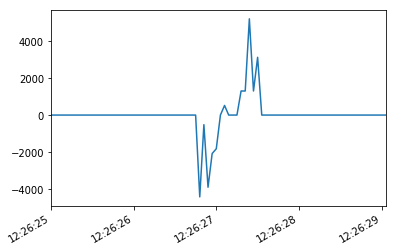

In [20]:
df_joined['brakeDIff'] = df_joined['brake'].diff()
#df_joined['brakeDIff'].plot()
dfNew = df_joined[(df_joined.session_id == 175.0) & (df_joined.scenario == 6.0) & (df_joined.pedId == 1.0)  & (df_joined.nextPedRunning == True)]
dfNew['brakeDIff'].plot()

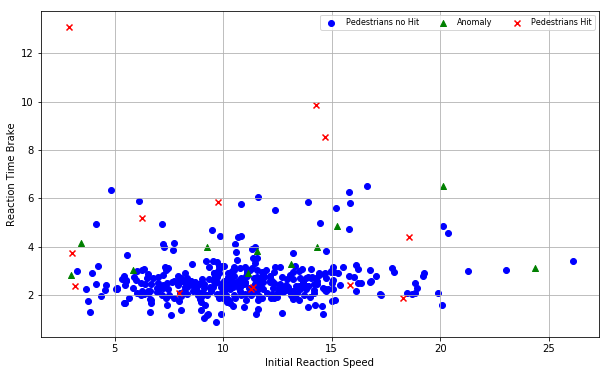

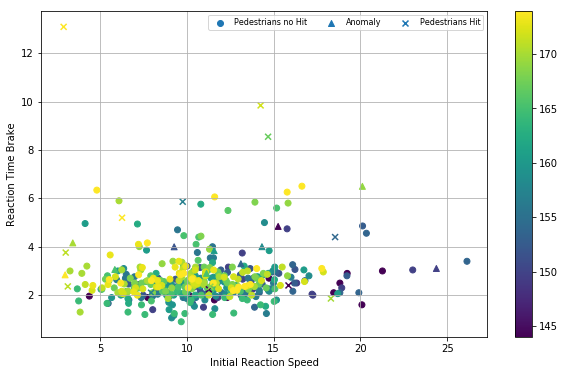

In [24]:
startReactionBrake = df_joined[(df_joined.nextPedRunning == True) & (df_joined.brakeDIff >= 0)  & (df_joined.scenario != 7) & (df_joined.scenario != 8)]
finishReactionBrake = df_joined[(df_joined.nextPedRunning == True) & (df_joined.brakeDIff > 1000)  & (df_joined.scenario != 7) & (df_joined.scenario != 8)]
firstPedCross = startReactionBrake.groupby(['session_id', 'scenario', 'pedId'], as_index=False).first()
lastPedCross = finishReactionBrake.groupby(['session_id', 'scenario', 'pedId'], as_index=False).first()
#lastPedCross

dataSpeedHit = []
dataReactionBHit = []
throttleHit = []
dataSpeedNoHit = []
dataReactionBNoHit = []
throttleNoHit = []
dataSpeedAlmostHit = []
dataReactionBAlmostHit = []
throttleAlmostHit = []

pedInfoReactBreak = []

reactionPerScenario = [[],[],[],[],[],[],[],[],[]]

for filaPedCross in firstPedCross.iterrows():
    session = filaPedCross[1][0]
    scenario = filaPedCross[1][1]
    pedId = filaPedCross[1][2]
    #posx = filaPedCross[1][4]
    #posy = filaPedCross[1][13]
    #print (filaPedCross[1])
    timeIni = filaPedCross[1][13]
    speed = filaPedCross[1][9]
    throttle = filaPedCross[1][16]
    timeFin = lastPedCross[(lastPedCross.session_id == session) & (lastPedCross.pedId == pedId)  & (lastPedCross.scenario == scenario)]
    #posPedFinY = lastPedCross[(lastPedCross.session_id == session) & (lastPedCross.pedId == pedId)  & (lastPedCross.scenario == scenario)]["posPedY"]
    #print (timeIni)
    if ( not timeFin.empty):
        #print (timeFin.iloc[0][13])
        #print (timeFin)
        reactionBrake = timeFin.iloc[0][13] - timeIni
        #print (reactionBrake)
        #print (reactionBrake.total_seconds())
        #print (float(reactionBrake.total_seconds()))
        reactionBrake = float(reactionBrake.total_seconds())
        #numero = int(reactionBrake.total_seconds()*1000000)
        #tupla = (session,scenario,pedId,numero, speed)
        #pedInfoReactBreak.append(tupla)
        if (reactionBrake > 50):
            continue
        lista = reactionPerScenario[int(scenario)]
        lista.append(reactionBrake)
        try:
            hitCrossed = hitCrossPerSession[session][scenario][pedId]
        except KeyError:
            continue
        if (pedId == 16 or pedId == 17):
            continue
        if (hitCrossed[0] == False and hitCrossed[1] == False):
            continue
        if (hitCrossed[0] == False and hitCrossed[1] == True):
            dataSpeedNoHit.append(speed)
            dataReactionBNoHit.append(reactionBrake)
            throttleNoHit.append(session)
            continue
        if (hitCrossed[0] == True and hitCrossed[1] == False):
            dataSpeedAlmostHit.append(speed)
            dataReactionBAlmostHit.append(reactionBrake)
            throttleAlmostHit.append(session)
            continue
        if (hitCrossed[0] == True and hitCrossed[1] == True):
            dataSpeedHit.append(speed)
            dataReactionBHit.append(reactionBrake)
            throttleHit.append(session)
            continue
    #posPedFinX2 = posPedFinX.iloc[0]
    #posPedFinY2 = posPedFinY.iloc[0]
    
    #print posPedFinX2, posPedFinY2
    #pedHit = ((session, scenario, pedId) in pedsHit)
    #pedCrossed = pedCross([posx, posy], posPedIniX, posPedIniY, posPedFinX2, posPedFinY2)
    #tupla = (session,scenario,pedId,pedHit, pedCrossed)
    #pedInfo.append(tupla)
plt.figure(figsize=(10, 6))
plt.xlabel("Initial Reaction Speed")
plt.ylabel("Reaction Time Brake")
colors = ['b', 'g', 'y', 'm', 'r']

noHits = plt.scatter(dataSpeedNoHit, dataReactionBNoHit, marker='o', c='b')
Almosthits = plt.scatter(dataSpeedAlmostHit, dataReactionBAlmostHit, marker='^', c='g')
hits = plt.scatter(dataSpeedHit, dataReactionBHit, marker='x', c='r')
 
#'^'


plt.legend(( noHits, Almosthits,  hits),
           ("Pedestrians no Hit", "Anomaly" ,"Pedestrians Hit"),
           scatterpoints=1,
           ncol=3,
           fontsize=8)
    
#plt.scatter(speeds,pedRates,c=scenariosSpeedPed, label=['Low Peds','High Peds',3,4,6,7,8])
#plt.legend(('Low Outlier', 'LoLo', 'Lo', 'Average', 'Hi', 'HiHi', 'High Outlier'), scatterpoints=1,
#           loc='lower left',
#           ncol=3,
#           fontsize=8)
#plt.legend(('Low Peds', 'High Peds', 'Lo', 'Average', 'Hi', 'HiHi', 'High Outlier'), scatterpoints=1)
plt.grid(True)

#plt.colorbar(noHits)

#plt.colorbar(hits)
#plt.xticks(scenarios, labels)
#plt.savefig('InitialSpeedAndReactionBrakeNewRateWithoutDogs.pdf')
plt.show()
    
plt.figure(figsize=(10, 6))
plt.xlabel("Initial Reaction Speed")
plt.ylabel("Reaction Time Brake")
colors = ['b', 'g', 'y', 'm', 'r']

#cmap = cm.get_cmap('PiYG', 11)  


 
#'^'
# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.5,.5,.5,1.0)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0,20,21)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
#scat = ax.scatter(x,y,c=tag,s=np.random.randint(100,500,20),cmap=cmap, norm=norm)

noHits = plt.scatter(dataSpeedNoHit, dataReactionBNoHit, marker='o', c=throttleNoHit,cmap=cmap, norm=norm)
Almosthits = plt.scatter(dataSpeedAlmostHit, dataReactionBAlmostHit, marker='^', c=throttleAlmostHit,cmap=cmap, norm=norm)
hits = plt.scatter(dataSpeedHit, dataReactionBHit, marker='x', c=throttleHit,cmap=cmap, norm=norm)

# create a second axes for the colorbar
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')



plt.legend(( noHits, Almosthits,  hits),
           ("Pedestrians no Hit", "Anomaly" ,"Pedestrians Hit"),
           scatterpoints=1,
           ncol=3,
           fontsize=8)
    
#plt.scatter(speeds,pedRates,c=scenariosSpeedPed, label=['Low Peds','High Peds',3,4,6,7,8])
#plt.legend(('Low Outlier', 'LoLo', 'Lo', 'Average', 'Hi', 'HiHi', 'High Outlier'), scatterpoints=1,
#           loc='lower left',
#           ncol=3,
#           fontsize=8)
#plt.legend(('Low Peds', 'High Peds', 'Lo', 'Average', 'Hi', 'HiHi', 'High Outlier'), scatterpoints=1)
plt.grid(True)

#plt.colorbar(noHits)

plt.colorbar(hits)
#plt.xticks(scenarios, labels)
#plt.savefig('InitialSpeedAndReactionBrakeNewRateWithoutDogsThrottle.pdf')
plt.show()

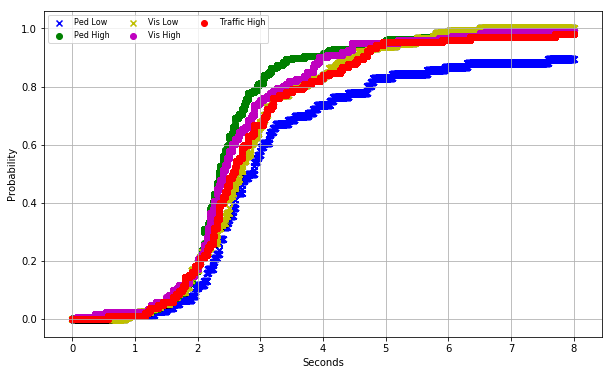

In [22]:
#reactions =  dataReactionBNoHit + dataReactionBAlmostHit + dataReactionBHit
reactions =  reactionPerScenario[1]
def distProb(x):
    total = len(reactions)
    cant = 0
    for elem in reactions:
        if (x >= elem):
            cant += 1
    prob = cant/total
    return prob

x = np.arange(0, 8, 0.0001)
#np.apply_along_axis(distProb, 0, x)
f = np.vectorize(distProb, otypes=[np.float])
distribution = f(x)

plt.figure(figsize=(10, 6))
plt.ylabel("Probability")
plt.xlabel("Seconds")


colors = ['b', 'g', 'y', 'm', 'r']
reactions =  reactionPerScenario[1]
DistrScenario1 = f(x)
reactions =  reactionPerScenario[2]
DistrScenario2 = f(x)
reactions =  reactionPerScenario[3]
DistrScenario3 = f(x)
reactions =  reactionPerScenario[4]
DistrScenario4 = f(x)
reactions =  reactionPerScenario[6]
DistrScenario6 = f(x)
lo = plt.scatter(x, DistrScenario1, marker='x', color=colors[0])
ll = plt.scatter(x, DistrScenario2, marker='o', color=colors[1])
l  = plt.scatter(x, DistrScenario3, marker='x', color=colors[2])
a  = plt.scatter(x, DistrScenario4, marker='o', color=colors[3])
h  = plt.scatter(x, DistrScenario6, marker='o', color=colors[4])

plt.legend((lo, ll, l, a, h),
           ("Ped Low","Ped High","Vis Low","Vis High","Traffic High"),
           scatterpoints=1,
           ncol=3,
           fontsize=8)
#noHits = plt.scatter(x, distribution, marker='o', c='b')
 
plt.grid(True)

#plt.savefig('DistributionScenarios.pdf')
plt.show()

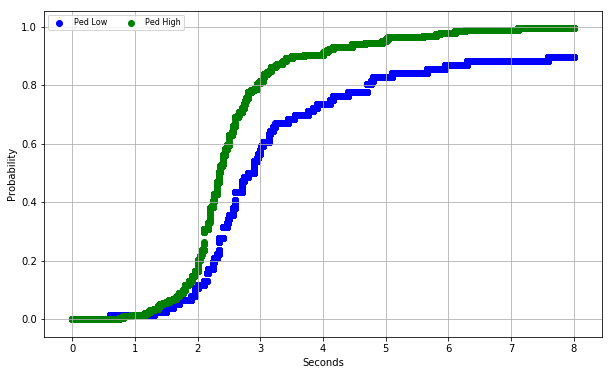

In [23]:
plt.figure(figsize=(10, 6))
plt.ylabel("Probability")
plt.xlabel("Seconds")


colors = ['b', 'g', 'y', 'm', 'r']
reactions =  reactionPerScenario[1]
DistrScenario1 = f(x)
reactions =  reactionPerScenario[2]
DistrScenario2 = f(x)
reactions =  reactionPerScenario[3]
DistrScenario3 = f(x)
reactions =  reactionPerScenario[4]
DistrScenario4 = f(x)
reactions =  reactionPerScenario[6]
DistrScenario6 = f(x)
lo = plt.scatter(x, DistrScenario1, marker='o', color=colors[0])
ll = plt.scatter(x, DistrScenario2, marker='o', color=colors[1])

plt.legend((lo, ll),
           ("Ped Low","Ped High"),
           scatterpoints=1,
           ncol=3,
           fontsize=8)
#noHits = plt.scatter(x, distribution, marker='o', c='b')
 
plt.grid(True)

plt.savefig('DistributionScenariosPedLowHigh.pdf')
plt.show()

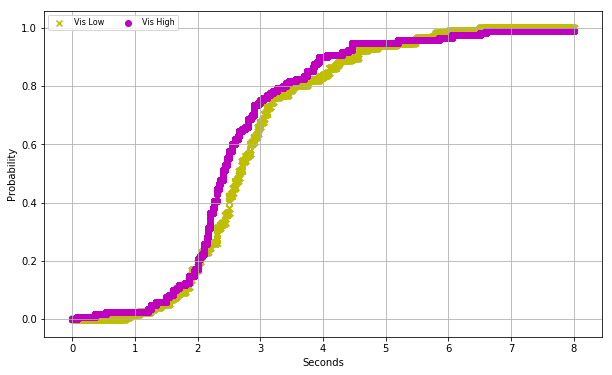

In [24]:

plt.figure(figsize=(10, 6))
plt.ylabel("Probability")
plt.xlabel("Seconds")


colors = ['b', 'g', 'y', 'm', 'r']
l  = plt.scatter(x, DistrScenario3, marker='x', color=colors[2])
a  = plt.scatter(x, DistrScenario4, marker='o', color=colors[3])

plt.legend(( l, a),
           ("Vis Low","Vis High"),
           scatterpoints=1,
           ncol=3,
           fontsize=8)
#noHits = plt.scatter(x, distribution, marker='o', c='b')
 
plt.grid(True)

plt.savefig('DistributionScenariosVisLowHigh.pdf')
plt.show()

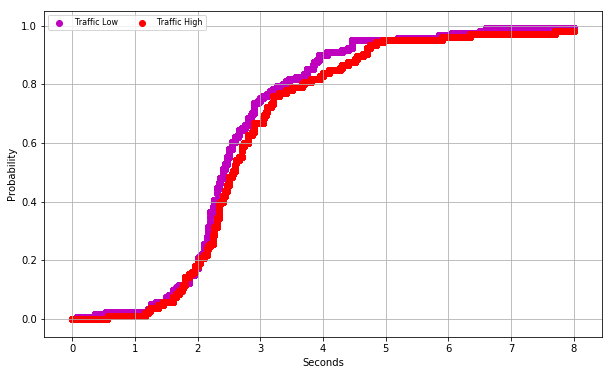

In [25]:

plt.figure(figsize=(10, 6))
plt.ylabel("Probability")
plt.xlabel("Seconds")


colors = ['b', 'g', 'y', 'm', 'r']
a  = plt.scatter(x, DistrScenario4, marker='o', color=colors[3])
h  = plt.scatter(x, DistrScenario6, marker='o', color=colors[4])

plt.legend((a, h),
           ("Traffic Low","Traffic High"),
           scatterpoints=1,
           ncol=3,
           fontsize=8)
#noHits = plt.scatter(x, distribution, marker='o', c='b')
 
plt.grid(True)

plt.savefig('DistributionScenariosTrafficLowHigh.pdf')
plt.show()

In [26]:
df_joined

,time,session_id,scenario,Pos_X,Pos_Y,hadCollision,pedId,nextPedRunning,distancePed,speed,posPedX,posPedY,currentDistance,time,steering,brake,throttle,brakeDIff
2017-10-04 12:46:18.050,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-04 12:46:18.048674,33096.0,65535.0,65535.0,NaN
2017-10-04 12:46:18.100,2017-10-04 12:46:18.071232,144.0,7.0,-975.749500,82.249620,0.0,17.0,0.0,70.352844,0.000000,154.041500,-23.487390,1253.502930,2017-10-04 12:46:18.088780,33096.0,65535.0,65535.0,0.0
2017-10-04 12:46:18.150,2017-10-04 12:46:18.071232,144.0,7.0,-975.749500,82.249620,0.0,17.0,0.0,70.352844,0.000000,154.041500,-23.487390,1253.502930,2017-10-04 12:46:18.148940,33096.0,65535.0,65535.0,0.0
2017-10-04 12:46:18.200,2017-10-04 12:46:18.071232,144.0,7.0,-975.749500,82.249620,0.0,17.0,0.0,70.352844,0.000000,154.041500,-23.487390,1253.502930,2017-10-04 12:46:18.188544,33096.0,65535.0,65535.0,0.0
2017-10-04 12:46:18.250,2017-10-04 12:46:18.071232,144.0,7.0,-975.749500,82.249620,0.0,17.0,0.0,70.352844,0.000000,154.041500,-23.487390,1253.502930,2017-10-04 12:46:18.248732,33096.0,65535.0,65535.0,0.0
2017-10-04 12:46:18.300,2017-10-04 12:46:18.298839,144.0,7.0,-975.708100,82.252920,0.0,17.0,0.0,70.352844,0.128202,154.041500,-23.487390,1253.462650,2017-10-04 12:46:18.288812,33096.0,65535.0,65535.0,0.0
2017-10-04 12:46:18.350,2017-10-04 12:46:18.341954,144.0,7.0,-975.711365,82.249176,0.0,17.0,0.0,70.352844,0.142761,154.041500,-23.487390,1253.465450,2017-10-04 12:46:18.348972,33096.0,65535.0,65535.0,0.0
2017-10-04 12:46:18.400,2017-10-04 12:46:18.392588,144.0,7.0,-975.716000,82.244530,0.0,17.0,0.0,70.352844,0.108481,154.041500,-23.487390,1253.469730,2017-10-04 12:46:18.388577,33096.0,65535.0,65535.0,0.0
2017-10-04 12:46:18.450,2017-10-04 12:46:18.449740,144.0,7.0,-975.718300,82.241750,0.0,17.0,0.0,70.352844,0.056718,154.041500,-23.487390,1253.471800,2017-10-04 12:46:18.448737,33096.0,65535.0,65535.0,0.0
2017-10-04 12:46:18.500,2017-10-04 12:46:18.473804,144.0,7.0,-975.718750,82.241060,0.0,17.0,0.0,70.352844,0.033677,154.041500,-23.487390,1253.472170,2017-10-04 12:46:18.488844,33096.0,65535.0,65535.0,0.0
